# Import Data

In [2]:
import pandas as pd
import pickle
import numpy as np
from decimal import Decimal



In [19]:
data_list=['DF_Results_SVM.pkl',
           'DF_Results_SVM_noSex.pkl',
           'DF_Results_SVM_noSexInf_Clean.pkl',
           'DF_Results_NB.pkl',
           'DF_Results_NB_noSex.pkl',
           'DF_Results_NB_noSexInf_Clean.pkl',
           'DF_Results_tree.pkl',
           'DF_Results_Tree_noSex.pkl',
           'DF_Results_Tree_noSexInf_Clean.pkl',
           'DF_Results_NN.pkl',
           'DF_Results_NN_noSex.pkl',
           'DF_Results_NN_noSexInf_Clean.pkl',
          ]
classifier_names=['SVM',
            'SVM_noSex',
            'SVM_noSexInf',
            'NB',
            'NB_noSex',
            'NB_noSexInf',
            'Tree',
            'Tree_noSex',
            'Tree_noSexInf',
            'NN',
            'NN_noSex',
            'NN_noSexInf'
]

data=pd.DataFrame(columns=["Classifier","Exp. Group","# Dataset","Seed","Ratio Men","Probability Men","Probability Women","Difference Probabilities","Confusion Matrix Men","Confusion Matrix Women"])

for i in data_list:
    with open(i,'rb') as f:
        tempdata=pickle.load(f)
        data=pd.concat({'all_data': data, 'new_data': tempdata},ignore_index=True)  

print("Done")
print(len(data))

Done
976800


In [71]:
with open('possibleacc.pkl', 'rb') as f:
    possible_accuracys=pickle.load(f)

expected_bias=[]
possible_accuracy_men=[]
possible_accuracy_women=[]
possible_accuracy=[]
i=1
while i<13:
    for j in range(0,148):
        expected_bias.append(possible_accuracys['Expected Bias'][j])
        possible_accuracy_men.append(possible_accuracys['possible accuracys men'][j])
        possible_accuracy_women.append(possible_accuracys['possible accuracys women'][j])
        possible_accuracy.append(possible_accuracys['possible accuracys'][j])
    i+=1



# Calculate Accuracy and Bias

In [42]:
accuracy=[]
accuracy_men=[]
accuracy_women=[]
accuracy_bias=[]
tpr=[]
tpr_men=[]
tpr_women=[]
tpr_bias=[]
tnr=[]
tnr_men=[]
tnr_women=[]
tnr_bias=[]

for i in range(0,len(data)):
    acc_men=(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][1,1])/(1000*data['Ratio Men'][i])
    accuracy_men.append(float(acc_men))
    acc_women=(data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][1,1])/(1000*(1-data['Ratio Men'][i]))
    accuracy_women.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias.append(float(acc_bias))
    acc=(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)
    atpr=(data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Women'][i][1,1])/(data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Men'][i][1,0]+data['Confusion Matrix Women'][i][1,1]+data['Confusion Matrix Women'][i][1,0])
    tpr.append(atpr)
    if (data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Men'][i][1,0])!= 0:
        atpr_men=data['Confusion Matrix Men'][i][1,1]/(data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Men'][i][1,0])
    else:
        atpr_men='NaN'
    if (data['Confusion Matrix Women'][i][1,1]+data['Confusion Matrix Women'][i][1,0]) !=0:
        atpr_women=data['Confusion Matrix Women'][i][1,1]/(data['Confusion Matrix Women'][i][1,1]+data['Confusion Matrix Women'][i][1,0])
    else:
        atpr_women='NaN'
    tpr_men.append(atpr_men)
    tpr_women.append(atpr_women)
    if atpr_women !='NaN'and atpr_men !="NaN":
        atpr_bias=atpr_men-atpr_women
    else:
        atpr_bias='NaN'
    tpr_bias.append(atpr_bias)
    atnr=(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Women'][i][0,0])/(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][0,1]+data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][0,1])
    tnr.append(atnr)
    if (data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][0,1]) !=0:
        atnr_men=data['Confusion Matrix Men'][i][0,0]/(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][0,1])
    else:
        atnr_men='NaN'
    if (data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][0,1]) !=0:
        atnr_women=data['Confusion Matrix Women'][i][0,0]/(data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][0,1])
    else:
        atnr_women='NaN'
    tnr_men.append(atnr_men)
    tnr_women.append(atnr_women)
    if atnr_women !='NaN'and atnr_men !="NaN":
        atnr_bias=atnr_men-atnr_women
    else:
        atnr_bias='NaN'
    tnr_bias.append(atnr_bias)

print('Done')

data['accuracy']=accuracy
data['accurcy_women']=accuracy_women
data['accuracy_men']=accuracy_men
data['bias']=accuracy_bias
data['TPR']=tpr
data['TPR_Women']=tpr_women
data['TPR_Men']=tpr_men
data['TPR_bias']=tpr_bias
data['TNR']=tnr
data['TNR_Women']=tnr_women
data['TNR_Men']=tnr_men
data['TNR_bias']=tnr_bias


Done


,Classifier,Exp. Group,# Dataset,Seed,Ratio Men,Probability Men,Probability Women,Difference Probabilities,Confusion Matrix Men,Confusion Matrix Women,...,accuracy_men,bias,TPR,TPR_Women,TPR_Men,TPR_bias,TNR,TNR_Women,TNR_Men,TNR_bias
0,SVM,1,1,9318,0.50,0.05,0.05,0.00,"[[475, 0], [25, 0]]","[[471, 4], [18, 7]]",...,0.950000,-0.006000,0.140000,0.28,0.000000,-0.28,0.995789,0.991579,1.000000,0.008421
1,SVM,1,2,62,0.50,0.05,0.05,0.00,"[[474, 1], [22, 3]]","[[474, 1], [19, 6]]",...,0.954000,-0.006000,0.180000,0.24,0.120000,-0.12,0.997895,0.997895,0.997895,0.000000
2,SVM,1,3,4905,0.50,0.05,0.05,0.00,"[[473, 2], [19, 6]]","[[475, 0], [20, 5]]",...,0.958000,-0.002000,0.220000,0.2,0.240000,0.04,0.997895,1.000000,0.995789,-0.004211
3,SVM,1,4,4993,0.50,0.05,0.05,0.00,"[[471, 4], [12, 13]]","[[475, 0], [23, 2]]",...,0.968000,0.014000,0.300000,0.08,0.520000,0.44,0.995789,1.000000,0.991579,-0.008421
4,SVM,1,5,5517,0.50,0.05,0.05,0.00,"[[475, 0], [23, 2]]","[[475, 0], [22, 3]]",...,0.954000,-0.002000,0.100000,0.12,0.080000,-0.04,1.000000,1.000000,1.000000,0.000000
5,SVM,1,6,842,0.50,0.05,0.05,0.00,"[[475, 0], [23, 2]]","[[475, 0], [20, 5]]",...,0.954000,-0.006000,0.140000,0.2,0.080000,-0.12,1.000000,1.000000,1.000000,0.000000
6,SVM,1,7,6432,0.50,0.05,0.05,0.00,"[[475, 0], [20, 5]]","[[475, 0], [20, 5]]",...,0.960000,0.000000,0.200000,0.2,0.200000,0,1.000000,1.000000,1.000000,0.000000
7,SVM,1,8,577,0.50,0.05,0.05,0.00,"[[474, 1], [19, 6]]","[[475, 0], [25, 0]]",...,0.960000,0.010000,0.120000,0,0.240000,0.24,0.998947,1.000000,0.997895,-0.002105
8,SVM,1,9,3965,0.50,0.05,0.05,0.00,"[[475, 0], [25, 0]]","[[475, 0], [25, 0]]",...,0.950000,0.000000,0.000000,0,0.000000,0,1.000000,1.000000,1.000000,0.000000
9,SVM,1,10,3375,0.50,0.05,0.05,0.00,"[[474, 1], [22, 3]]","[[475, 0], [22, 3]]",...,0.954000,-0.002000,0.120000,0.12,0.120000,0,0.998947,1.000000,0.997895,-0.002105


In [43]:
data['Informativeness_Men']=data['Probability Men'] - Decimal(0.5)
data['Informativeness_Men']=data['Informativeness_Men'].abs()
data['Informativeness_Women']=data['Probability Women'] - Decimal(0.5)
data['Informativeness_Women']=data['Informativeness_Women'].abs()
data['Informativeness Difference']=data['Informativeness_Men']-data['Informativeness_Women']

In [ ]:
with open('evaluationdata.pkl','wb') as f:
    pickle.dump(data, f, protocol=2)

In [3]:
#ALTERNATIVE

'''with open('evaluationdata.pkl','rb') as f:
    data=pickle.load(f)
    
classifier_names=['SVM',
            'SVM_noSex',
            'SVM_noSexInf',
            'NB',
            'NB_noSex',
            'NB_noSexInf',
            'Tree',
            'Tree_noSex',
            'Tree_noSexInf',
            'NN',
            'NN_noSex',
            'NN_noSexInf'
]'''


# Description Data by Classifier & EG-Group

In [73]:
am=[]
asd=[]
amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
egs=[]
classifiers=[]

for classifier in classifier_names:
    for i in range(1,149): 
        data_class=data[data['Classifier']==classifier]
        data_eg=data_class[data_class['Exp. Group']==i]
        am.append(data_eg.loc[:,'accuracy'].mean())
        asd.append(data_eg.loc[:,'accuracy'].std())
        amm.append(data_eg.loc[:,'accuracy_men'].mean())
        amsd.append(data_eg.loc[:,'accuracy_men'].std())
        afm.append(data_eg.loc[:,'accurcy_women'].mean())           
        afsd.append(data_eg.loc[:,'accurcy_women'].std())
        biasm.append(data_eg.loc[:,'bias'].mean())
        biassd.append(data_eg.loc[:,'bias'].std())
        classifiers.append(classifier)
        egs.append(i)
        
data_group=pd.DataFrame()
data_group['Classifier']=classifiers
data_group['Exp. Group']=egs
data_group['Possible Accuracy']=possible_accuracy
data_group['Mean Accuracy']=am
data_group['SD Accuracy']=asd
data_group['Diff Acc']=data_group['Possible Accuracy']-data_group['Mean Accuracy']
data_group['Possible Accuracy Men']=possible_accuracy_men
data_group['Mean Accuracy Men']=amm
data_group['SD Accuracy Men']=amsd
data_group['Diff Acc Men']=data_group['Possible Accuracy Men']-data_group['Mean Accuracy Men']
data_group['Possible Accuracy Women']=possible_accuracy_women
data_group['Mean Accuracy Women']=afm
data_group['SD Accuracy Women']=afsd
data_group['Diff Acc Women']=data_group['Possible Accuracy Women']-data_group['Mean Accuracy Women']
data_group['Expected Bias']=expected_bias
data_group['Mean Bias']=biasm
data_group['SD Bias']=biassd
data_group['Diff Bias']=data_group['Expected Bias']-data_group['Mean Bias']

data_group.to_csv("DescriptiveByClassifierandEG.csv",sep=";")

data_group

,Classifier,Exp. Group,Possible Accuracy,Mean Accuracy,SD Accuracy,Diff Acc,Possible Accuracy Men,Mean Accuracy Men,SD Accuracy Men,Diff Acc Men,Possible Accuracy Women,Mean Accuracy Women,SD Accuracy Women,Diff Acc Women,Expected Bias,Mean Bias,SD Bias,Diff Bias
0,SVM,1,0.929329,0.954189,0.003305,-0.024860,0.928940,0.953804,0.004638,-0.024864,0.929718,0.954575,0.004975,-0.024856,-0.000778,-0.000771,0.006988,-0.000007
1,SVM,2,0.889063,0.908178,0.006431,-0.019115,0.928953,0.954309,0.004705,-0.025356,0.849173,0.862047,0.012406,-0.012875,0.079780,0.092262,0.013662,-0.012482
2,SVM,3,0.871245,0.883302,0.007748,-0.012057,0.928895,0.953982,0.005104,-0.025087,0.813595,0.812622,0.014678,0.000973,0.115300,0.141360,0.015584,-0.026060
3,SVM,4,0.865644,0.877205,0.008741,-0.011562,0.928967,0.954051,0.004822,-0.025084,0.802320,0.800360,0.017905,0.001960,0.126647,0.153691,0.019547,-0.027044
4,SVM,5,0.889385,0.909195,0.007151,-0.019809,0.849071,0.863167,0.012776,-0.014096,0.929700,0.955222,0.005334,-0.025522,-0.080629,-0.092055,0.013372,0.011425
5,SVM,6,0.849095,0.863380,0.009852,-0.014285,0.849015,0.864062,0.012557,-0.015047,0.849176,0.862698,0.012321,-0.013522,-0.000162,0.001364,0.015189,-0.001525
6,SVM,7,0.831312,0.838684,0.010291,-0.007372,0.849036,0.864524,0.012818,-0.015487,0.813587,0.812844,0.015203,0.000744,0.035449,0.051680,0.019164,-0.016231
7,SVM,8,0.825666,0.832595,0.010593,-0.006928,0.849000,0.864687,0.012965,-0.015687,0.802333,0.800502,0.017214,0.001831,0.046667,0.064185,0.021909,-0.017518
8,SVM,9,0.831956,0.840545,0.009093,-0.008589,0.849065,0.864789,0.013402,-0.015724,0.814847,0.816302,0.014332,-0.001455,0.034218,0.048487,0.020960,-0.014269
9,SVM,10,0.872852,0.886764,0.008602,-0.013912,0.816045,0.818364,0.016052,-0.002318,0.929658,0.955164,0.005416,-0.025505,-0.113613,-0.136800,0.016673,0.023187


# Konfidenzintervalle für den Bias
## 99.9887% Konfidenzintervalle auf Grund von Bonferronikorrektur für 3*148 EGs pro Classifierart

In [45]:
from scipy import stats
from scipy.stats import sem, t
from scipy import mean

confidence = 1-(0.05/(3*148))
starts=[]
means=[]
sd=[]
ends=[]
groups=[]
datasets=[]
widths=[]
significant_bias=[]
ratiomen=[]
probmen=[]
probwomen=[]
probdiff=[]
infdiff=[]

for classifier in classifier_names:
    print(classifier)
    dataa=data[data['Classifier']==classifier]
    for i in range(1,149):
        datac = dataa[dataa['Exp. Group']==i]['bias']
        n = len(datac)
        m = mean(datac)
        std_err = sem(datac)
        h = std_err * t.ppf((1 + confidence) / 2, n - 1)
        start = m - h
        end = m + h
        starts.append(start)
        means.append(m)
        sd.append(std_err)
        ends.append(end)
        groups.append(i)
        datasets.append(classifier)
        widths.append(2*h)
        if start<0 and end<0:
            significant_bias.append('Yes')
        else:
            if start>0 and end>0:
                significant_bias.append('Yes')
            else:
                significant_bias.append('No')
        da=dataa[dataa['Exp. Group']==i]
        ratiomen.append(da[da['# Dataset']==1]['Ratio Men'])
        probmen.append(da[da['# Dataset']==1]['Probability Men'])
        probwomen.append(da[da['# Dataset']==1]['Probability Women'])
        probdiff.append(da[da['# Dataset']==1]['Difference Probabilities'])
        infdiff.append(da[da['# Dataset']==1]['Informativeness Difference'])
    
biasconf=pd.DataFrame({'Classifier':datasets,
                       'Exp. Group' : groups,
                       'Ratio Men' : ratiomen,
                       'Prob Men' : probmen,
                       'Prob Women' : probwomen,
                       'Prob Diff' : probdiff,
                       'Informativeness Diff': infdiff,
                       'Lower Bound Bias' : starts, 
                       'Mean Bias':means,
                       'Upper Bound Bias' : ends,
                       'Width_Confidence_Intervall': widths,
                       'SD Bias':sd,
                      'Significant_Bias': significant_bias})


biasconf.to_csv("CI_Biases_ALLDATA.csv",sep=";")

biasconf

SVM
SVM_noSex
SVM_noSexInf
NB
NB_noSex
NB_noSexInf
Tree
Tree_noSex
Tree_noSexInf
NN
NN_noSex
NN_noSexInf


,Classifier,Exp. Group,Ratio Men,Prob Men,Prob Women,Prob Diff,Informativeness Diff,Lower Bound Bias,Mean Bias,Upper Bound Bias,Width_Confidence_Intervall,SD Bias,Significant_Bias
0,SVM,1,"0 0.50 Name: Ratio Men, dtype: object","0 0.05 Name: Probability Men, dtype: object","0 0.05 Name: Probability Women, dtype: object","0 0.00 Name: Difference Probabilities, dtyp...","0 0.00 Name: Informativeness Difference, dt...",-0.001930,-0.000771,0.000388,0.002318,0.000298,No
1,SVM,2,"550 0.50 Name: Ratio Men, dtype: object","550 0.05 Name: Probability Men, dtype: object","550 0.20 Name: Probability Women, dtype: ob...","550 0.15 Name: Difference Probabilities, dt...","550 0.15 Name: Informativeness Difference, ...",0.089996,0.092262,0.094528,0.004532,0.000583,Yes
2,SVM,3,"1100 0.50 Name: Ratio Men, dtype: object","1100 0.05 Name: Probability Men, dtype: object","1100 0.35 Name: Probability Women, dtype: o...","1100 0.30 Name: Difference Probabilities, d...","1100 0.30 Name: Informativeness Difference,...",0.138775,0.141360,0.143945,0.005170,0.000665,Yes
3,SVM,4,"1650 0.50 Name: Ratio Men, dtype: object","1650 0.05 Name: Probability Men, dtype: object","1650 0.50 Name: Probability Women, dtype: o...","1650 0.45 Name: Difference Probabilities, d...","1650 0.45 Name: Informativeness Difference,...",0.150449,0.153691,0.156933,0.006484,0.000833,Yes
4,SVM,5,"2200 0.50 Name: Ratio Men, dtype: object","2200 0.20 Name: Probability Men, dtype: object","2200 0.05 Name: Probability Women, dtype: o...","2200 -0.15 Name: Difference Probabilities, ...",2200 -0.15 Name: Informativeness Difference...,-0.094272,-0.092055,-0.089837,0.004436,0.000570,Yes
5,SVM,6,"2750 0.50 Name: Ratio Men, dtype: object","2750 0.20 Name: Probability Men, dtype: object","2750 0.20 Name: Probability Women, dtype: o...","2750 0.00 Name: Difference Probabilities, d...","2750 0.00 Name: Informativeness Difference,...",-0.001156,0.001364,0.003883,0.005039,0.000648,No
6,SVM,7,"3300 0.50 Name: Ratio Men, dtype: object","3300 0.20 Name: Probability Men, dtype: object","3300 0.35 Name: Probability Women, dtype: o...","3300 0.15 Name: Difference Probabilities, d...","3300 0.15 Name: Informativeness Difference,...",0.048501,0.051680,0.054859,0.006357,0.000817,Yes
7,SVM,8,"3850 0.50 Name: Ratio Men, dtype: object","3850 0.20 Name: Probability Men, dtype: object","3850 0.50 Name: Probability Women, dtype: o...","3850 0.30 Name: Difference Probabilities, d...","3850 0.30 Name: Informativeness Difference,...",0.060552,0.064185,0.067819,0.007268,0.000934,Yes
8,SVM,9,"4400 0.50 Name: Ratio Men, dtype: object","4400 0.20 Name: Probability Men, dtype: object","4400 0.65 Name: Probability Women, dtype: o...","4400 0.45 Name: Difference Probabilities, d...","4400 0.15 Name: Informativeness Difference,...",0.045011,0.048487,0.051964,0.006953,0.000894,Yes
9,SVM,10,"4950 0.50 Name: Ratio Men, dtype: object","4950 0.35 Name: Probability Men, dtype: object","4950 0.05 Name: Probability Women, dtype: o...","4950 -0.30 Name: Difference Probabilities, ...",4950 -0.30 Name: Informativeness Difference...,-0.139566,-0.136800,-0.134034,0.005531,0.000711,Yes


# Visualisierung

In [61]:
#Import von benötigten Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

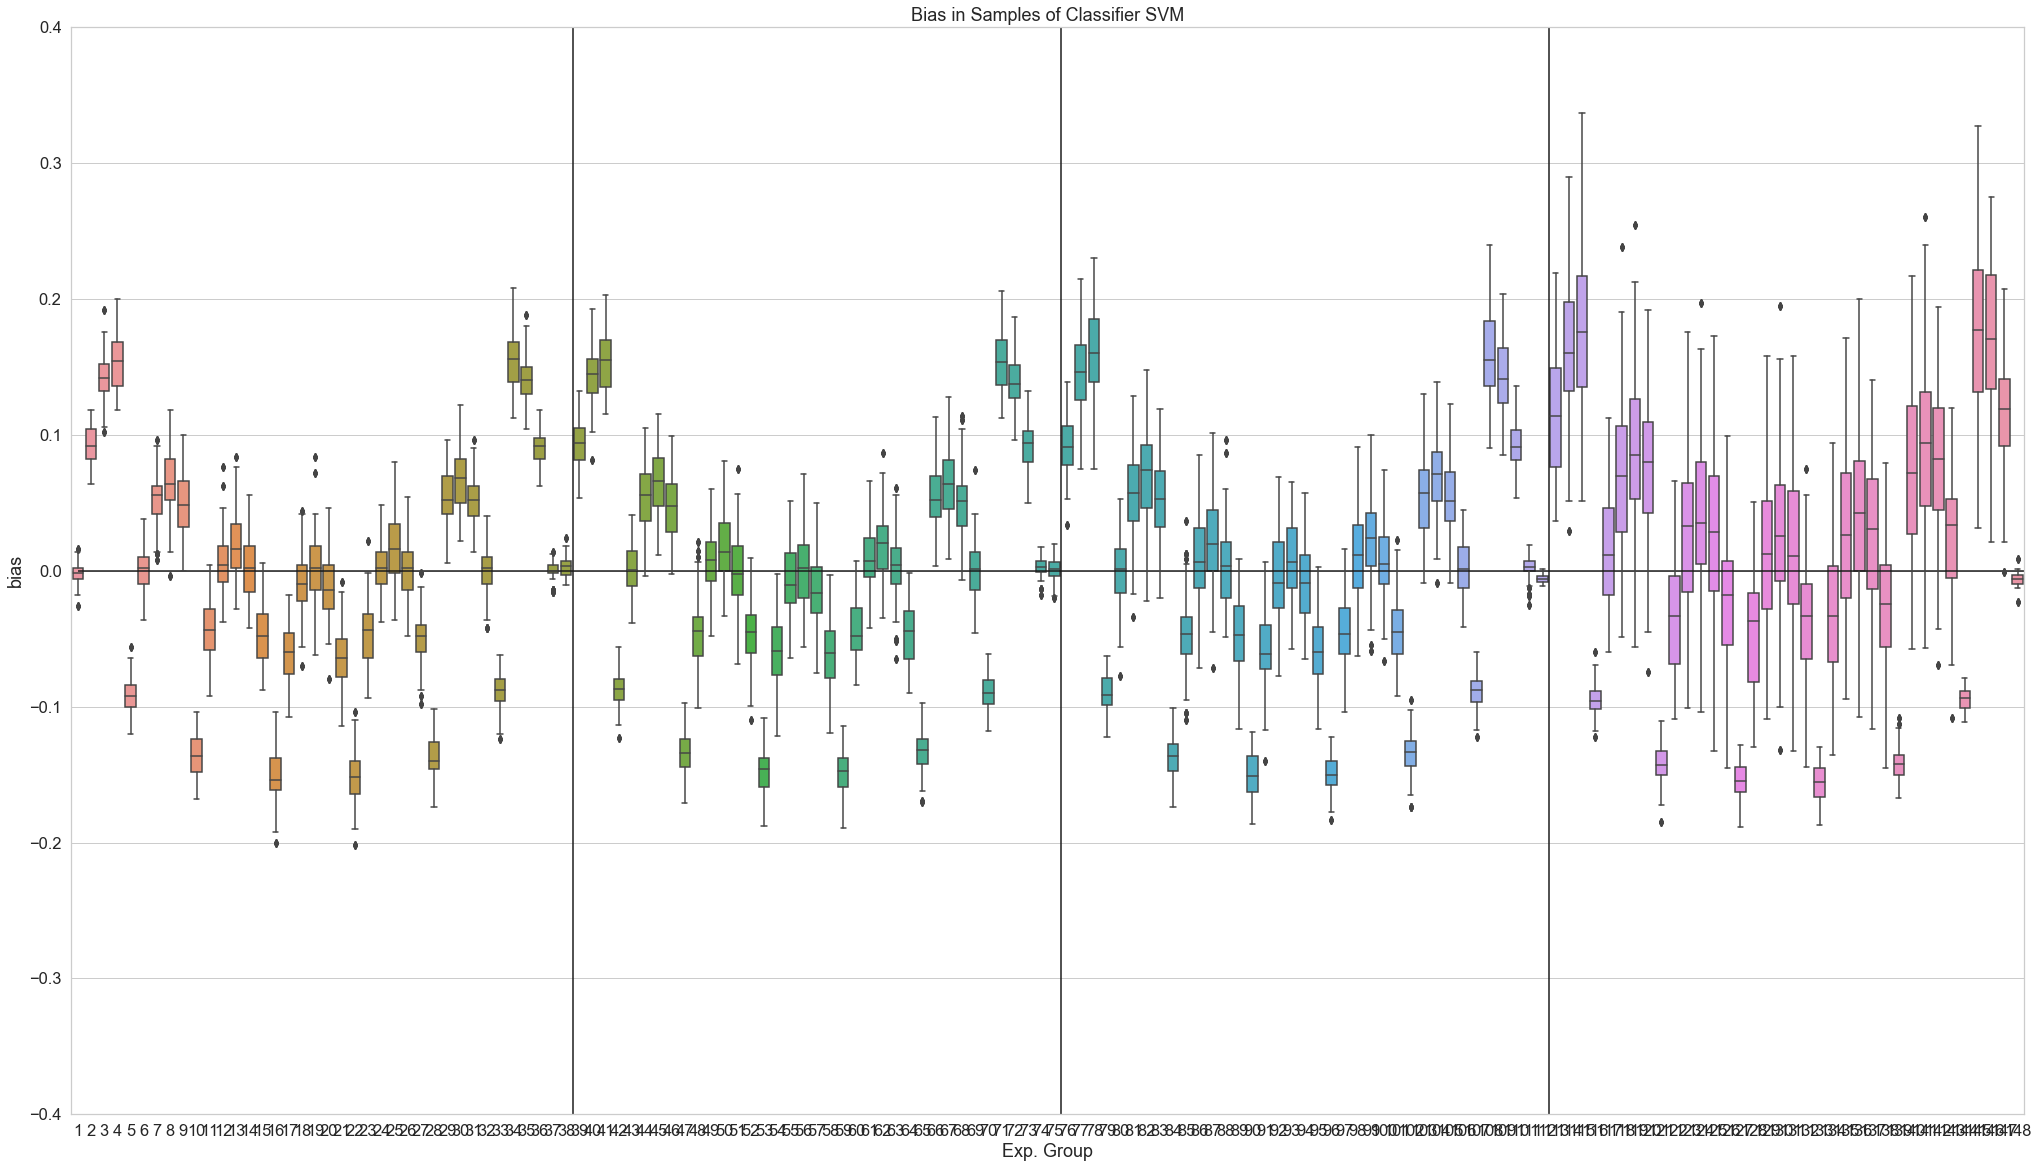

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier SVM")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='SVM'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_SVM.png")
    

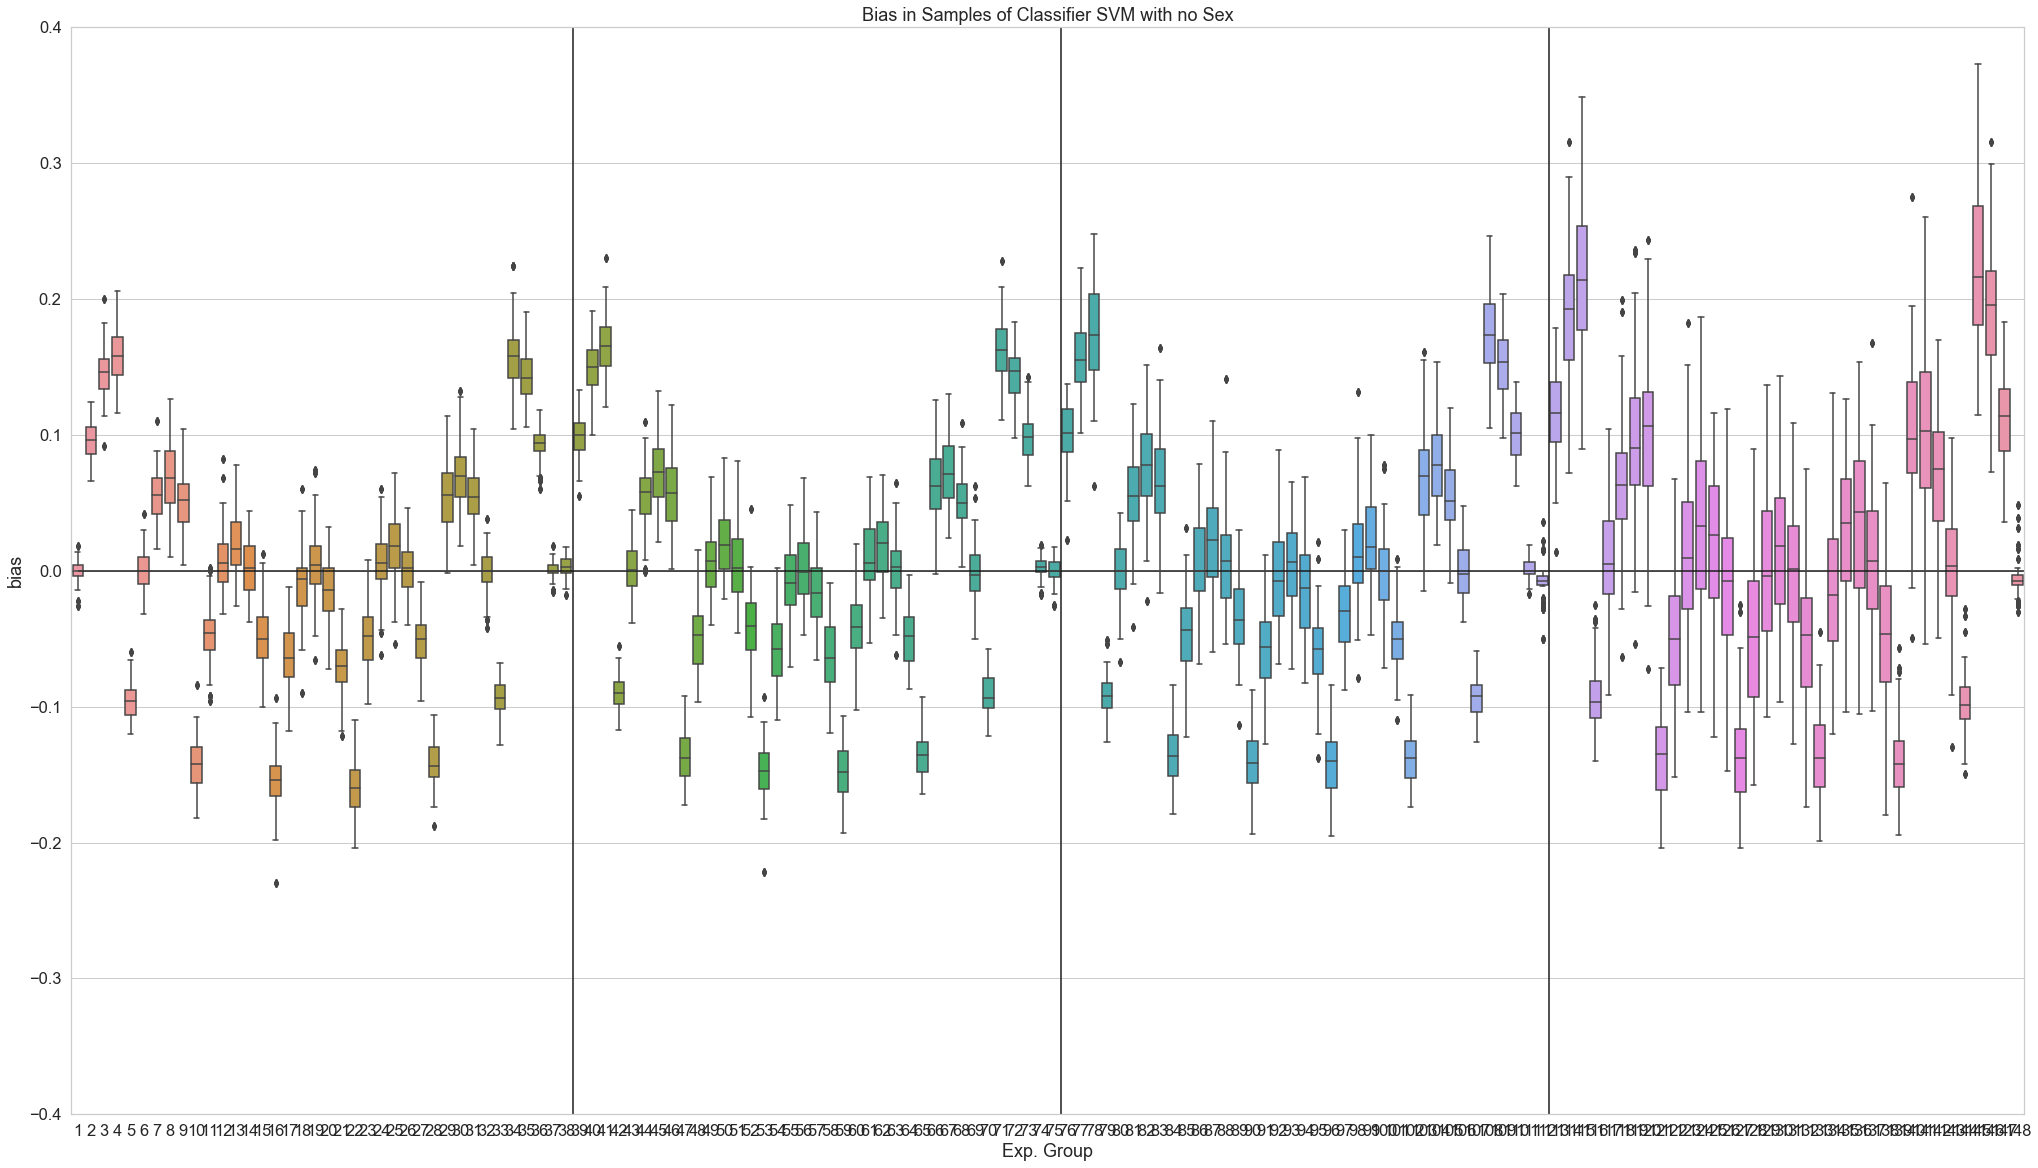

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier SVM with no Sex")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='SVM_noSex'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_SVM_noSex.png")

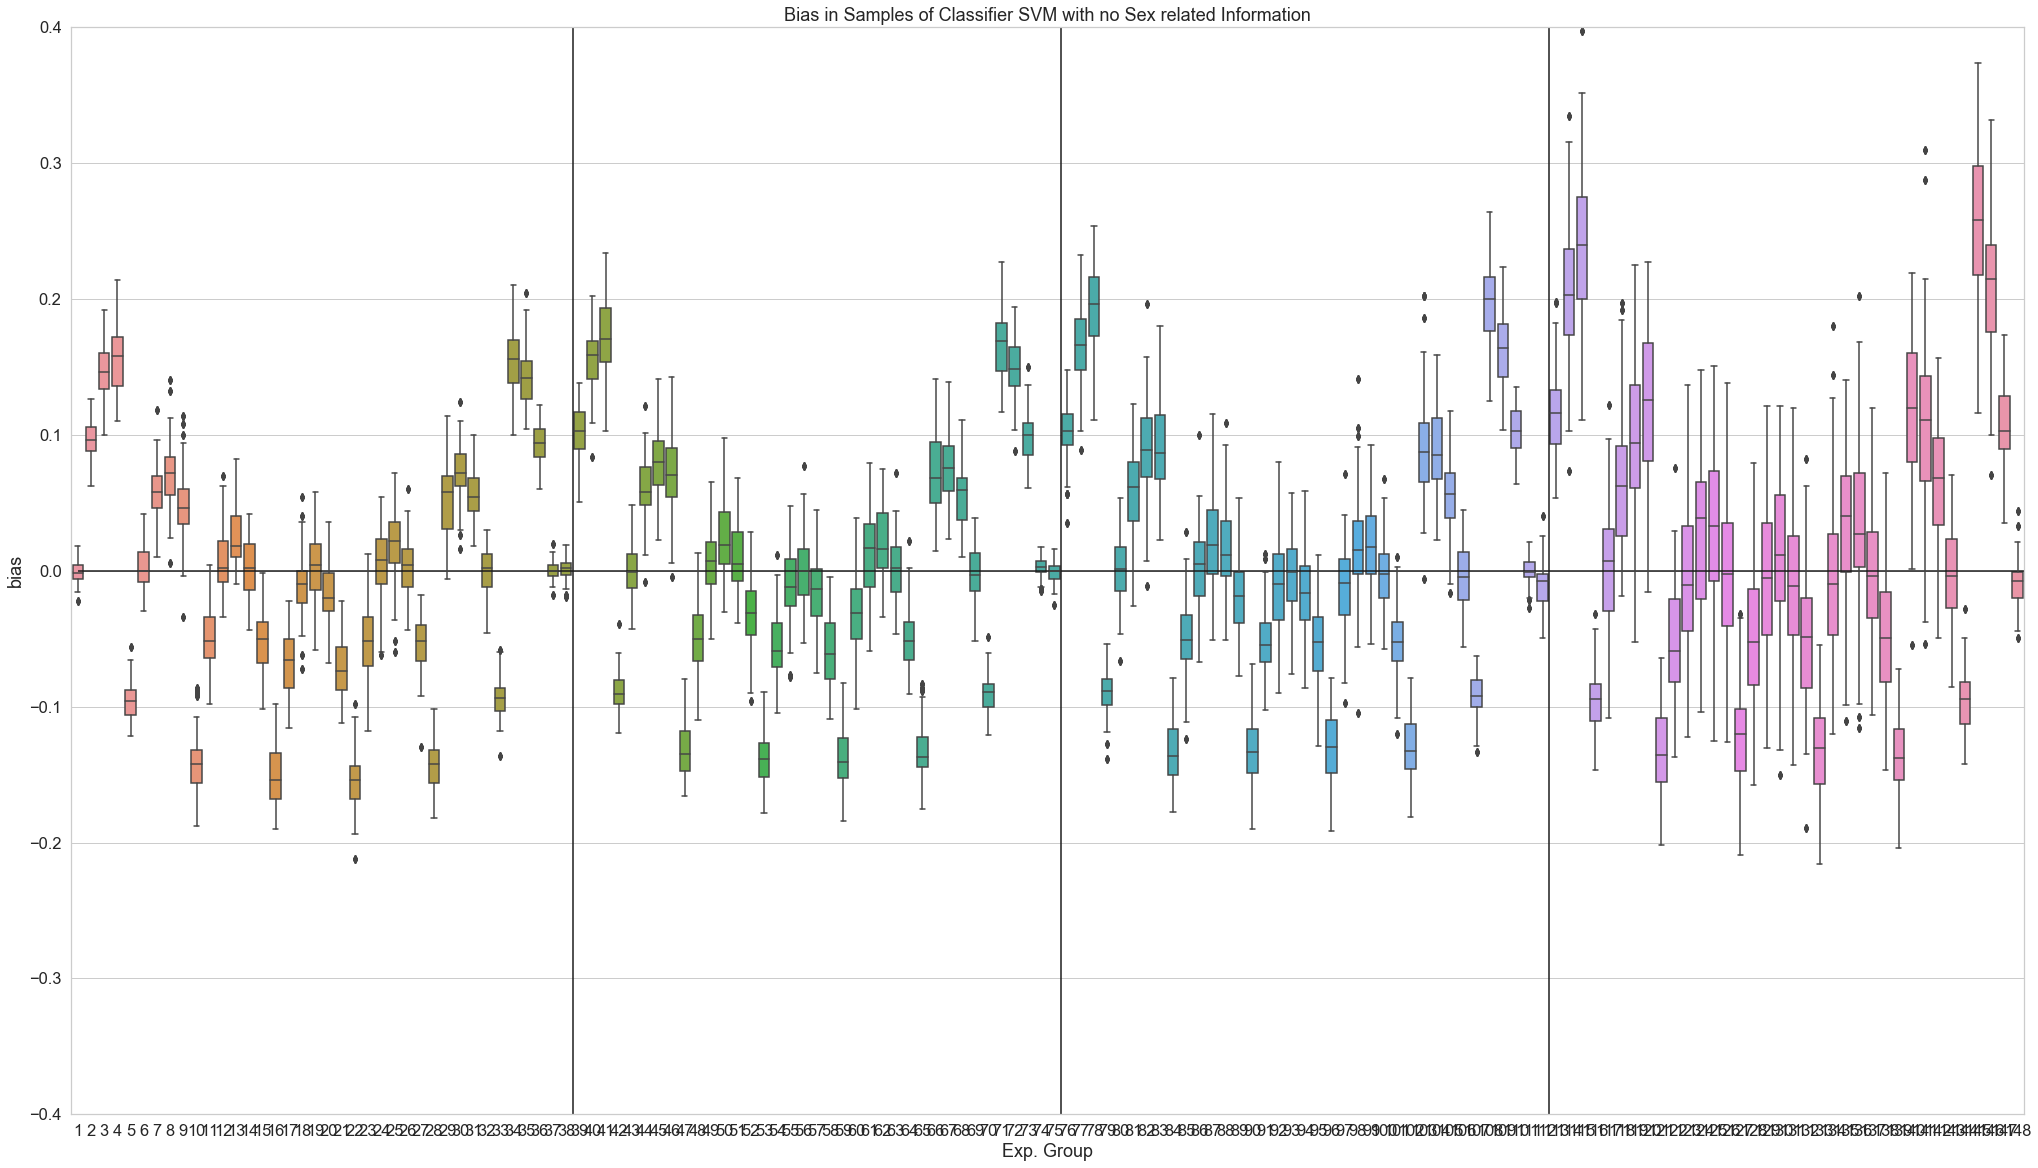

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier SVM with no Sex related Information")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='SVM_noSexInf'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_SVM_noSexInf.png")

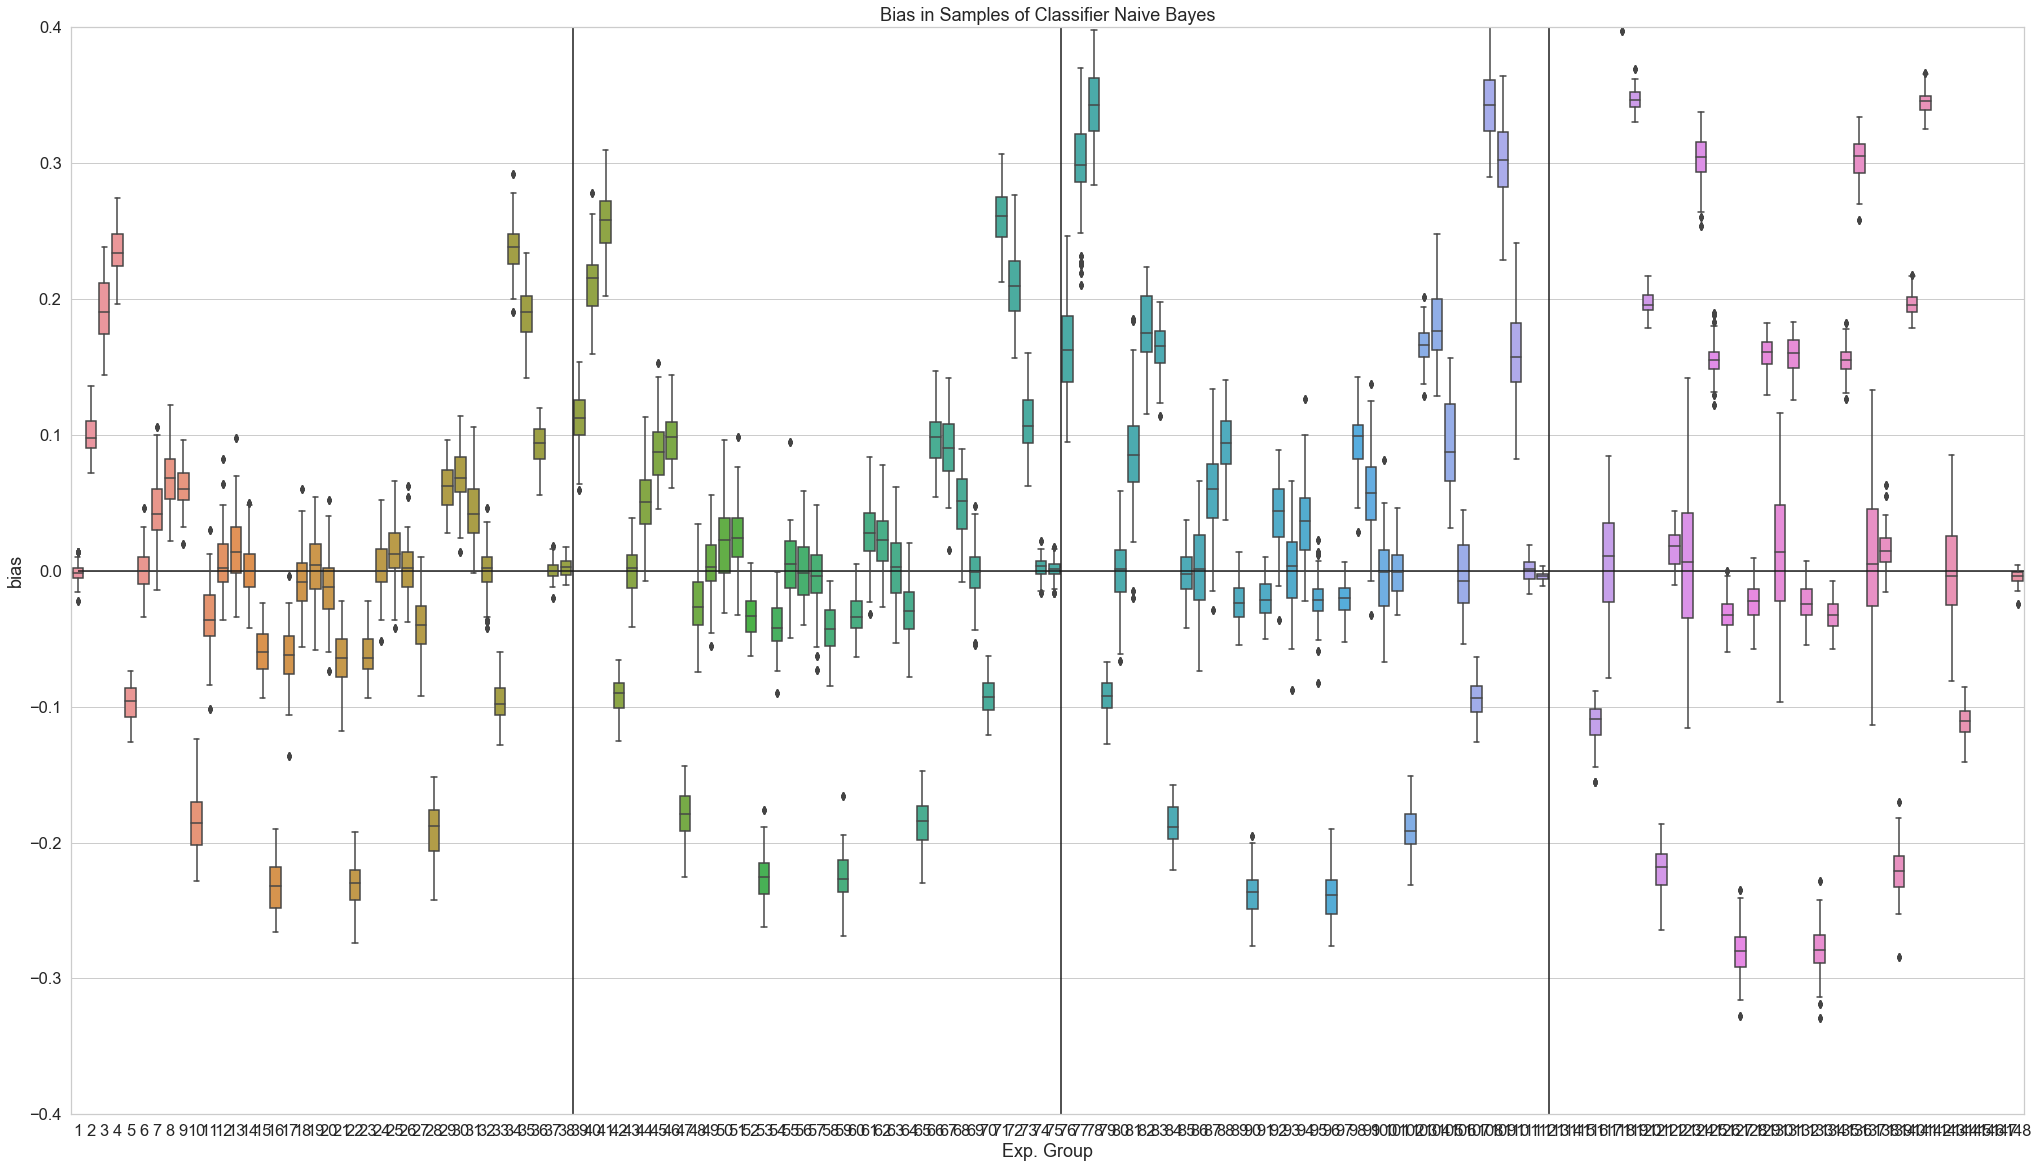

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Naive Bayes")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NB'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NB.png")

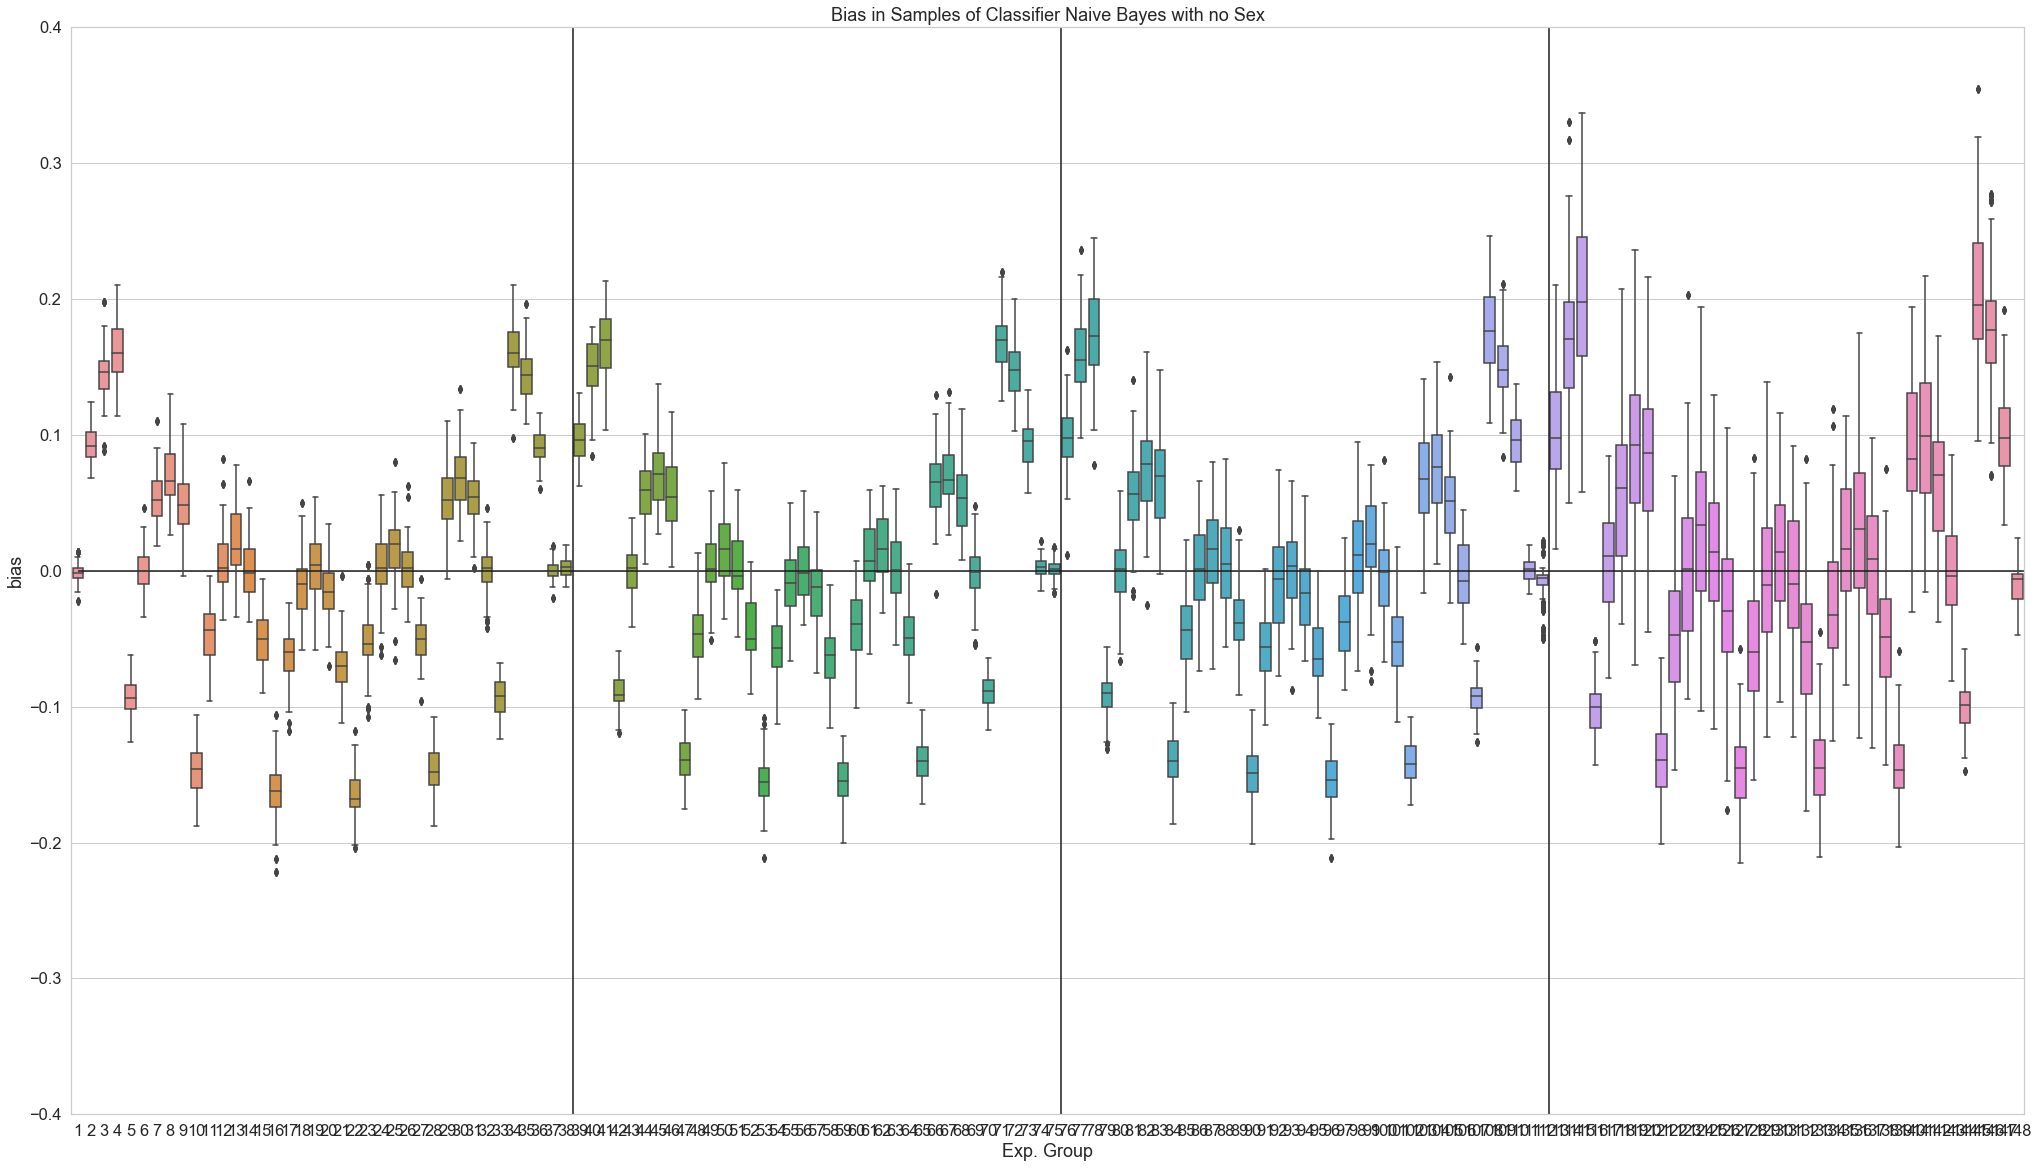

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Naive Bayes with no Sex")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NB_noSex'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NB_noSex.png")

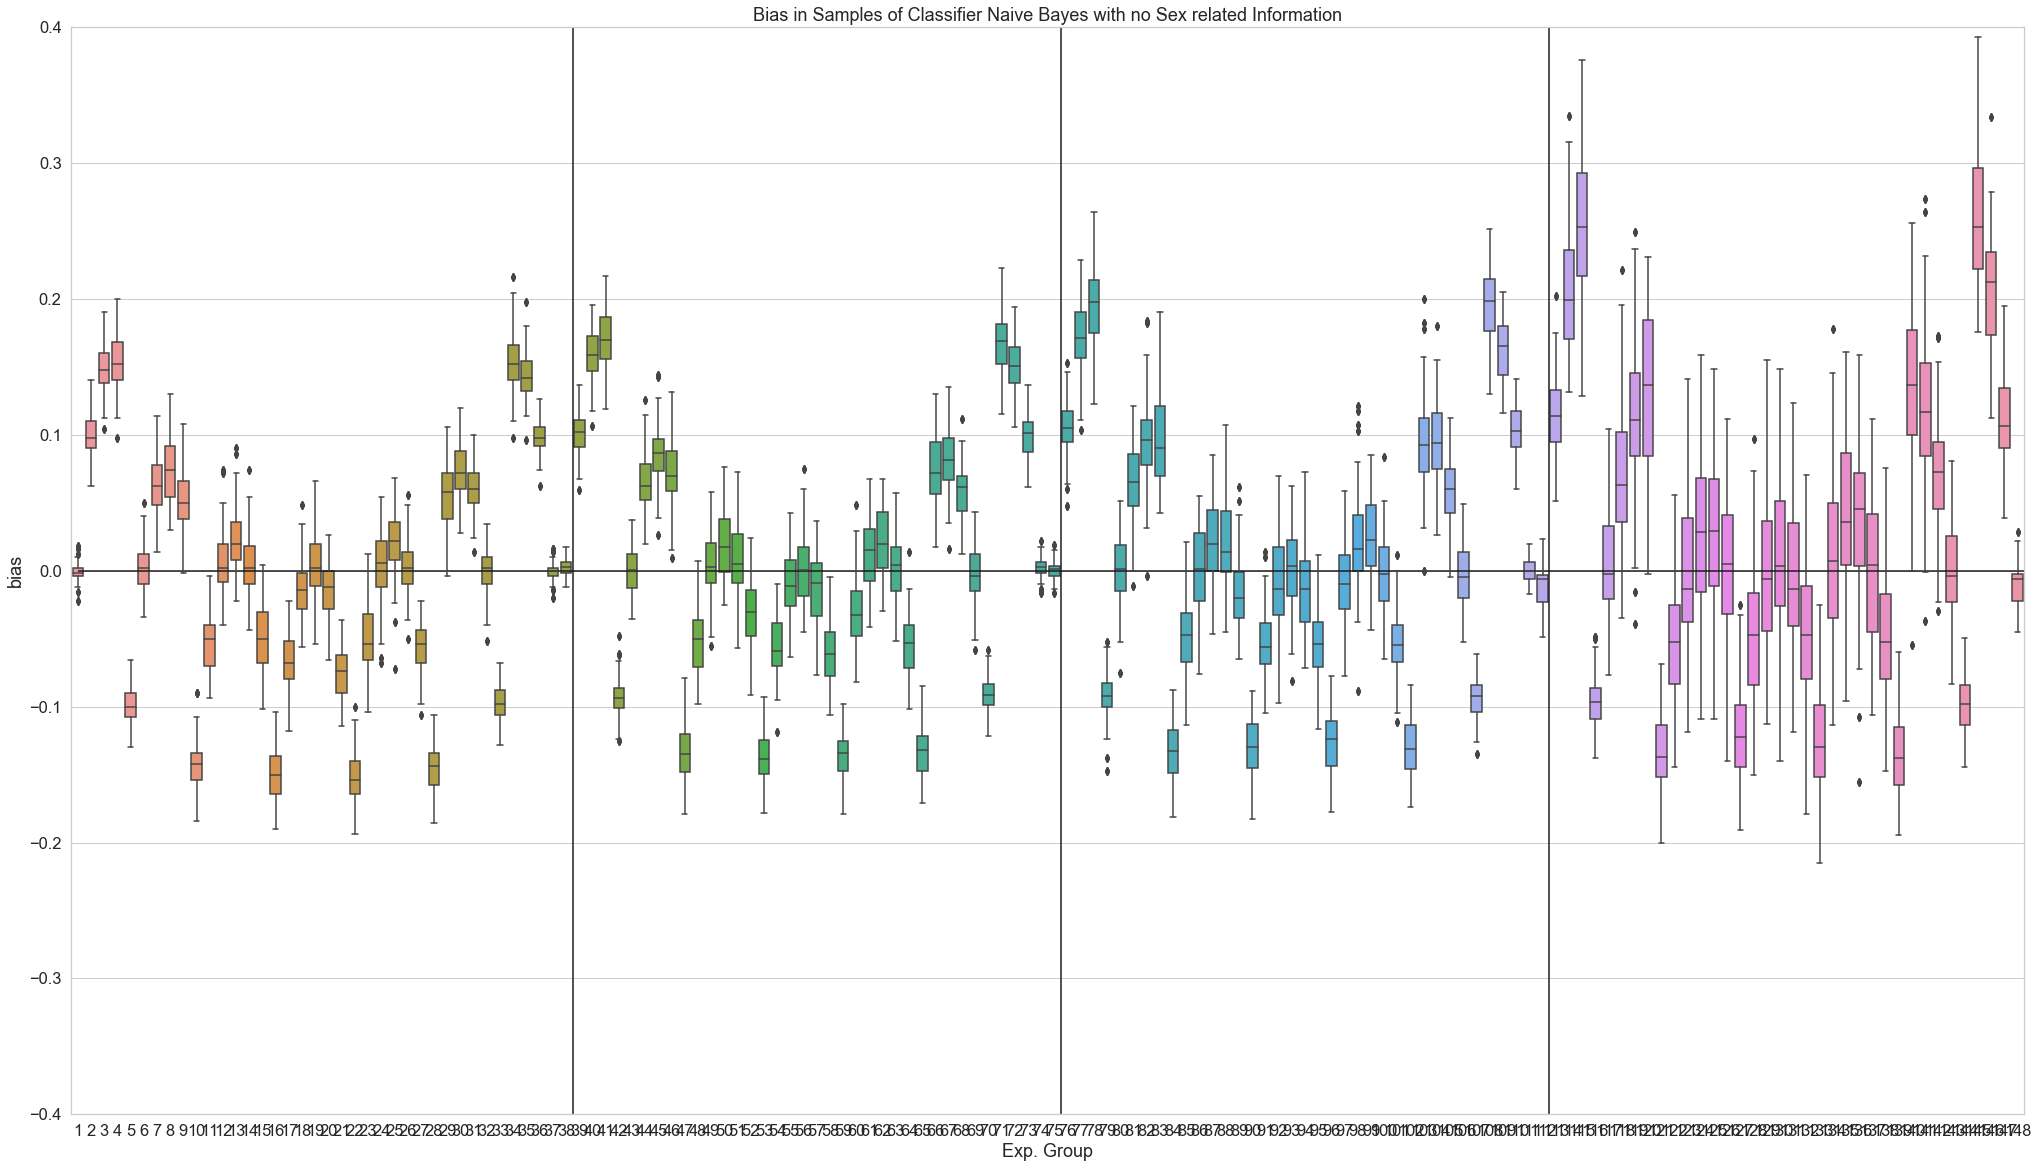

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Naive Bayes with no Sex related Information")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NB_noSexInf'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NB_noSexInf.png")

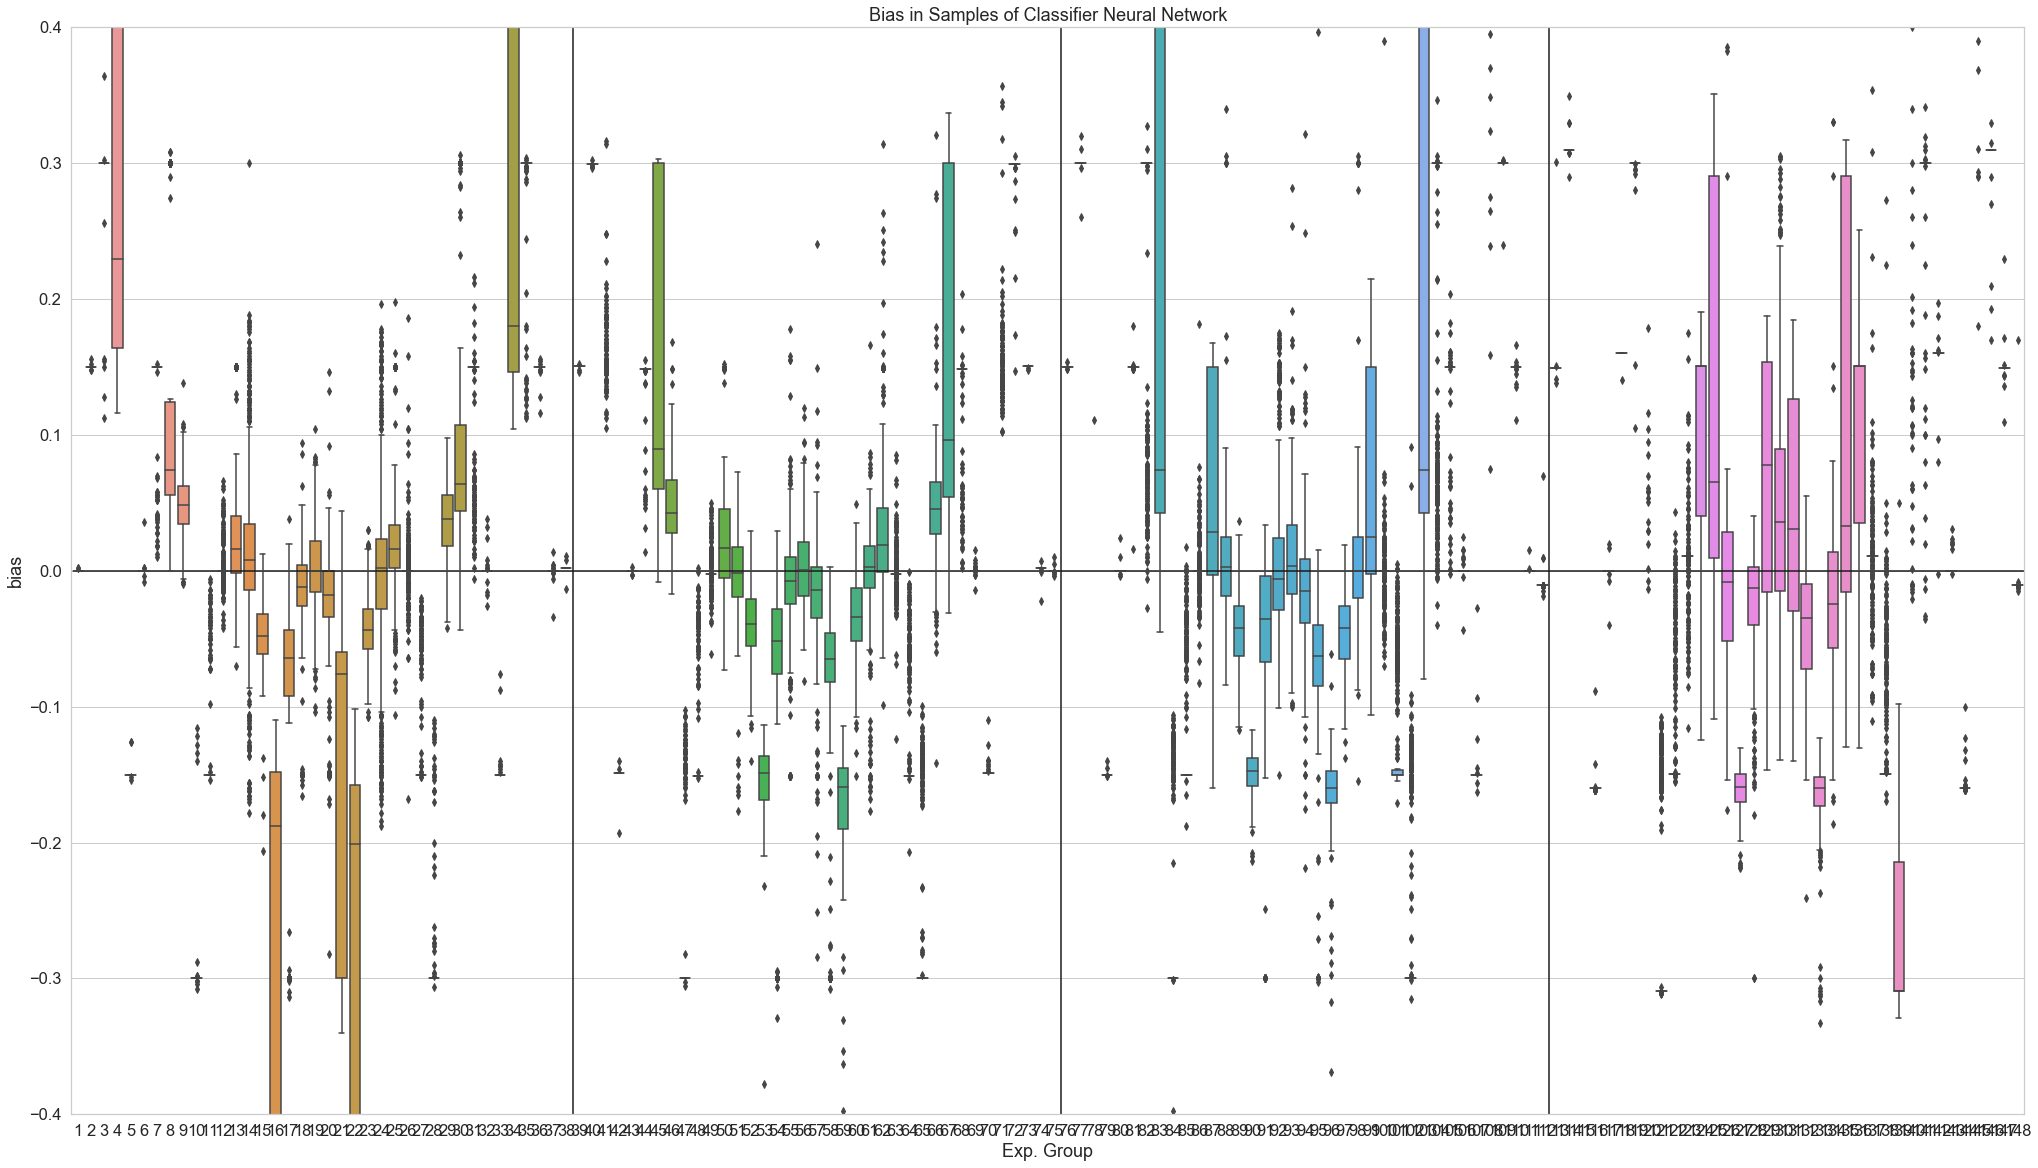

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Neural Network")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NN'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NN.png")

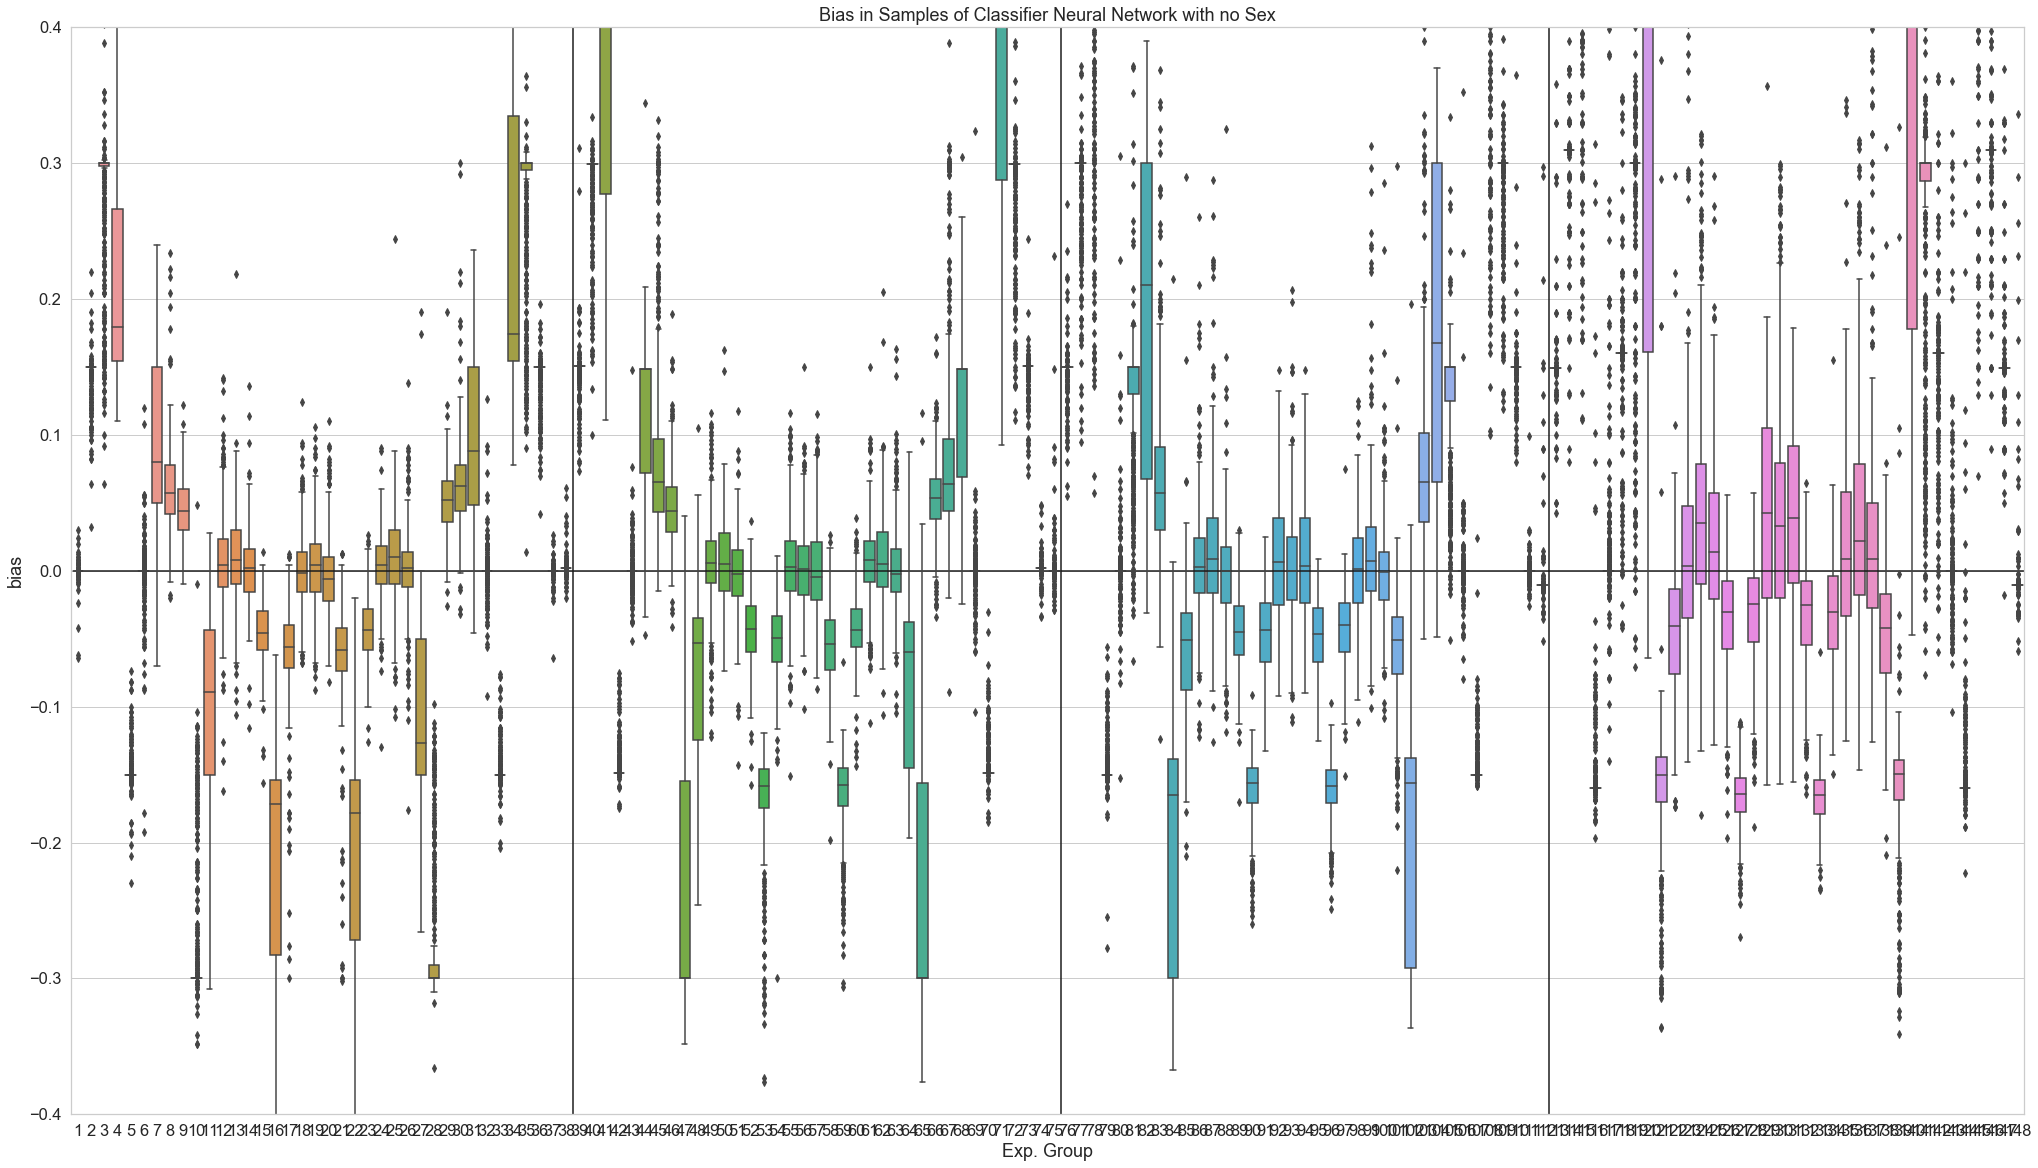

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Neural Network with no Sex")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NN_noSex'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NN_noSex.png")

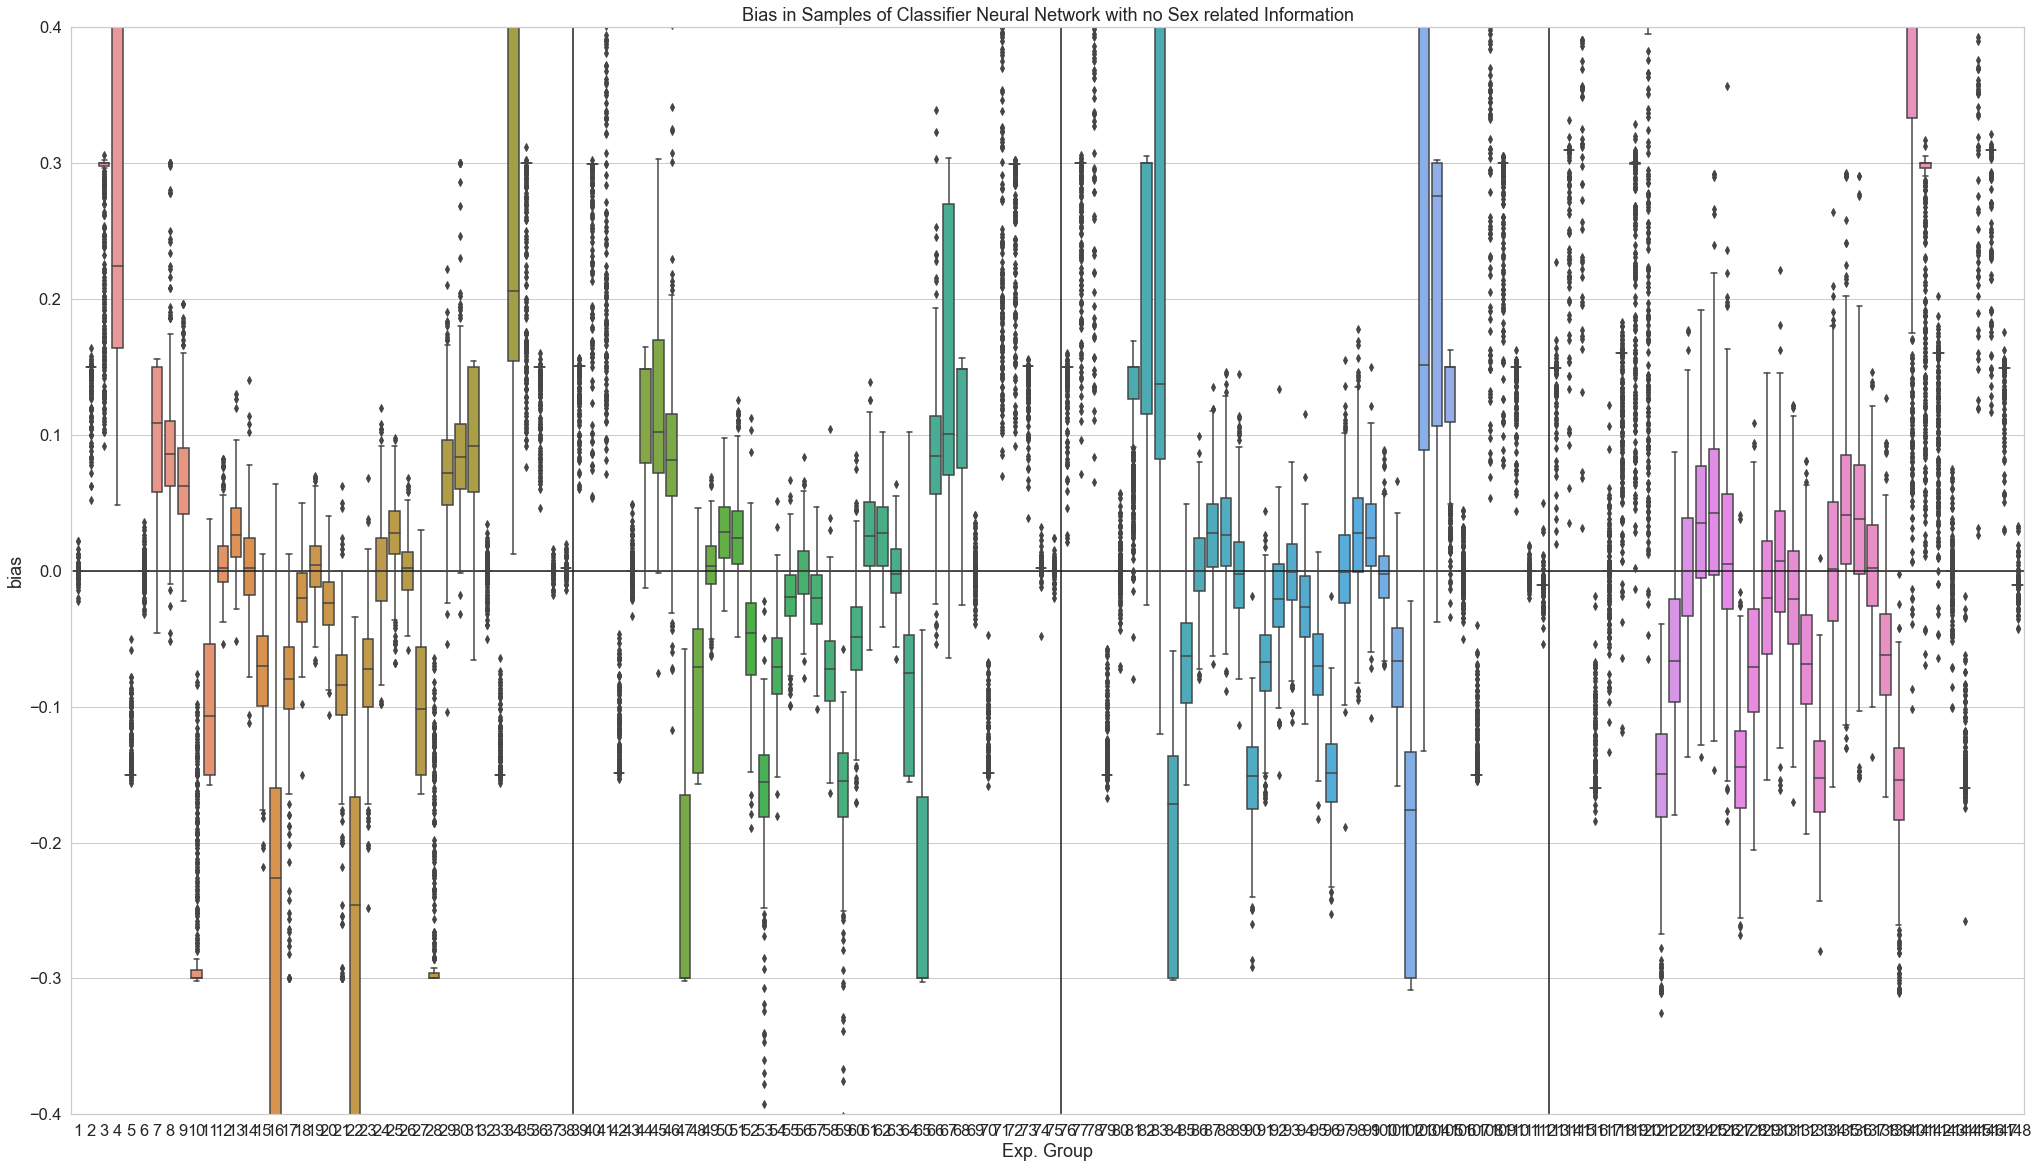

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Neural Network with no Sex related Information")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='NN_noSexInf'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_NN_noSexInf.png")

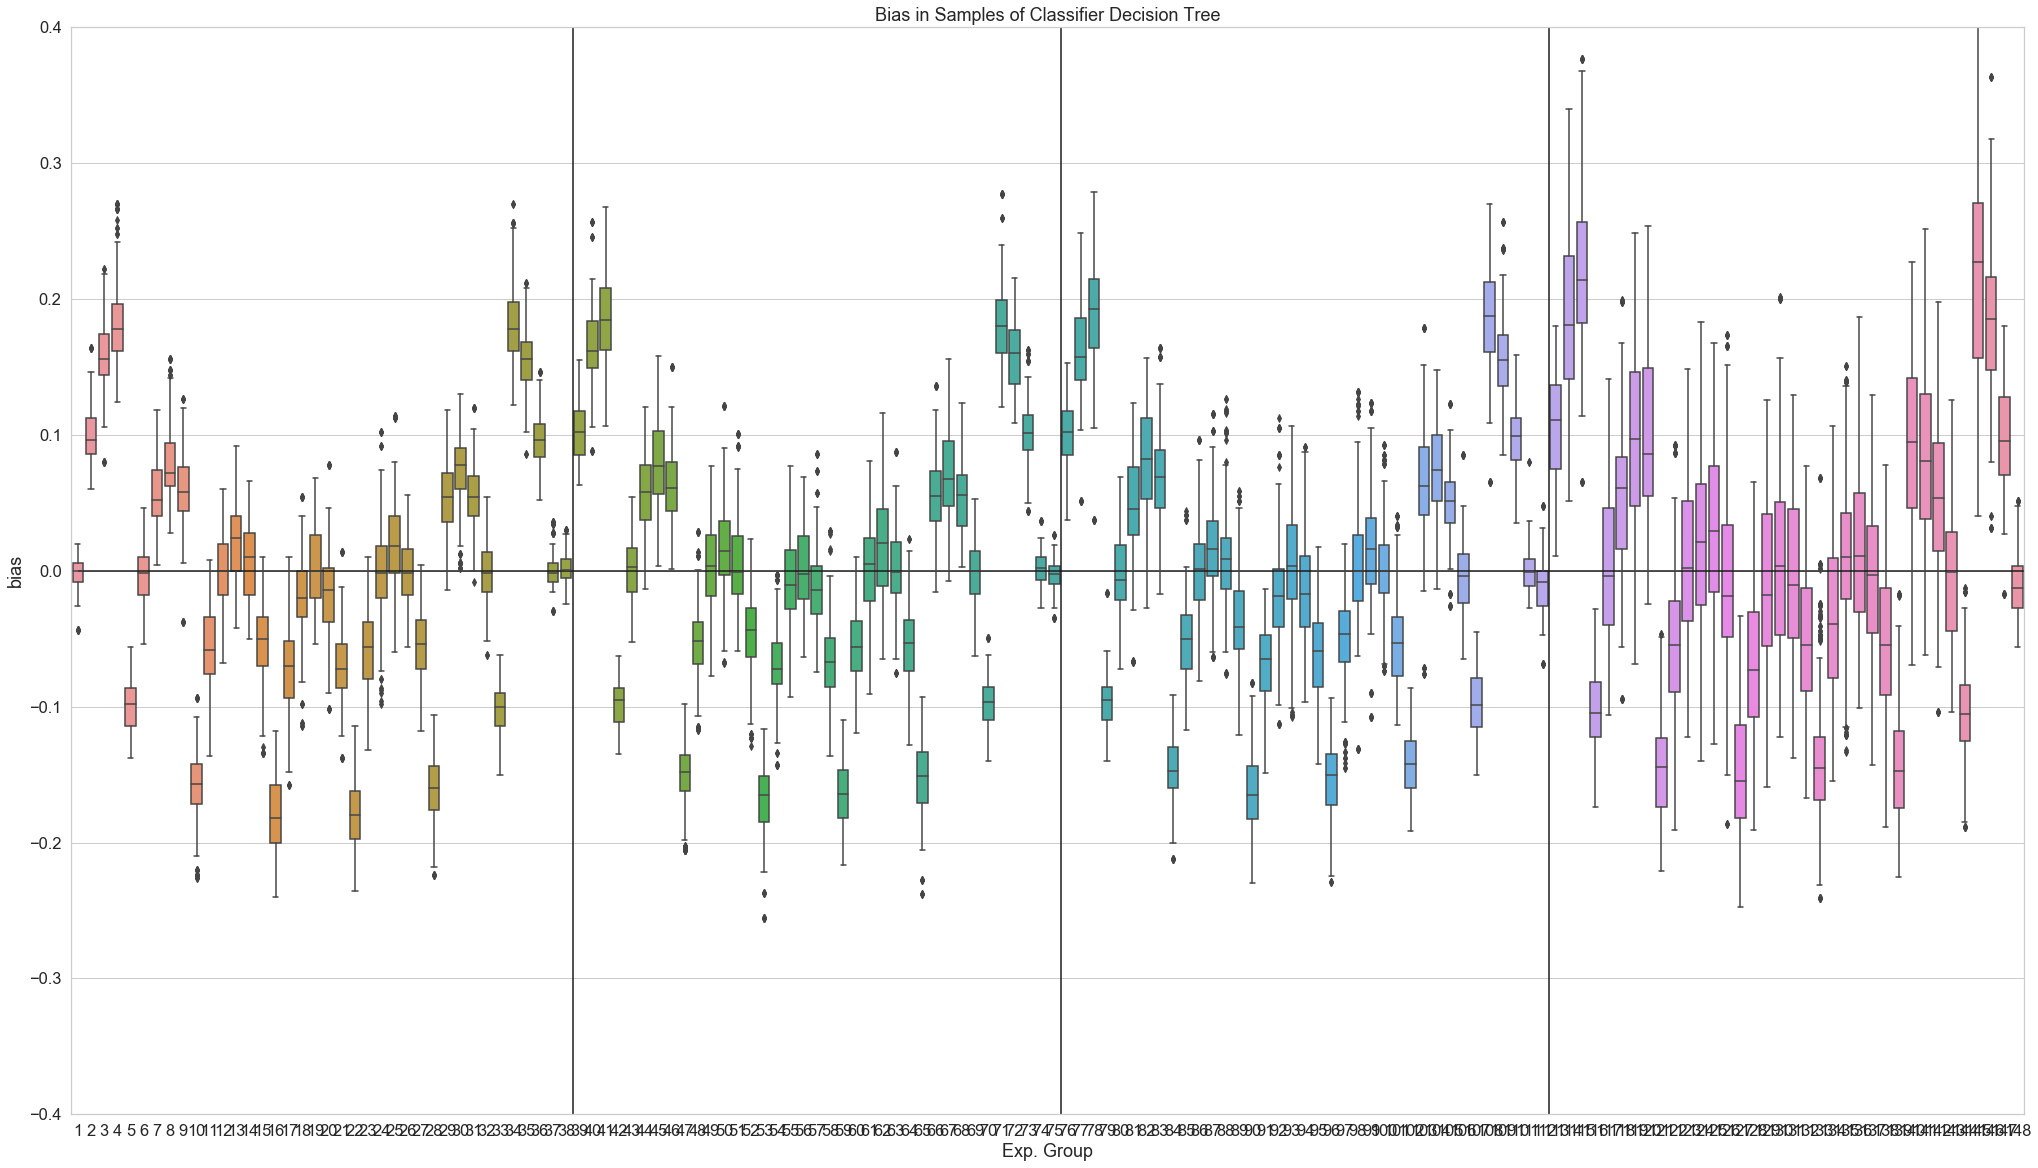

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Decision Tree")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='Tree'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_Tree.png")

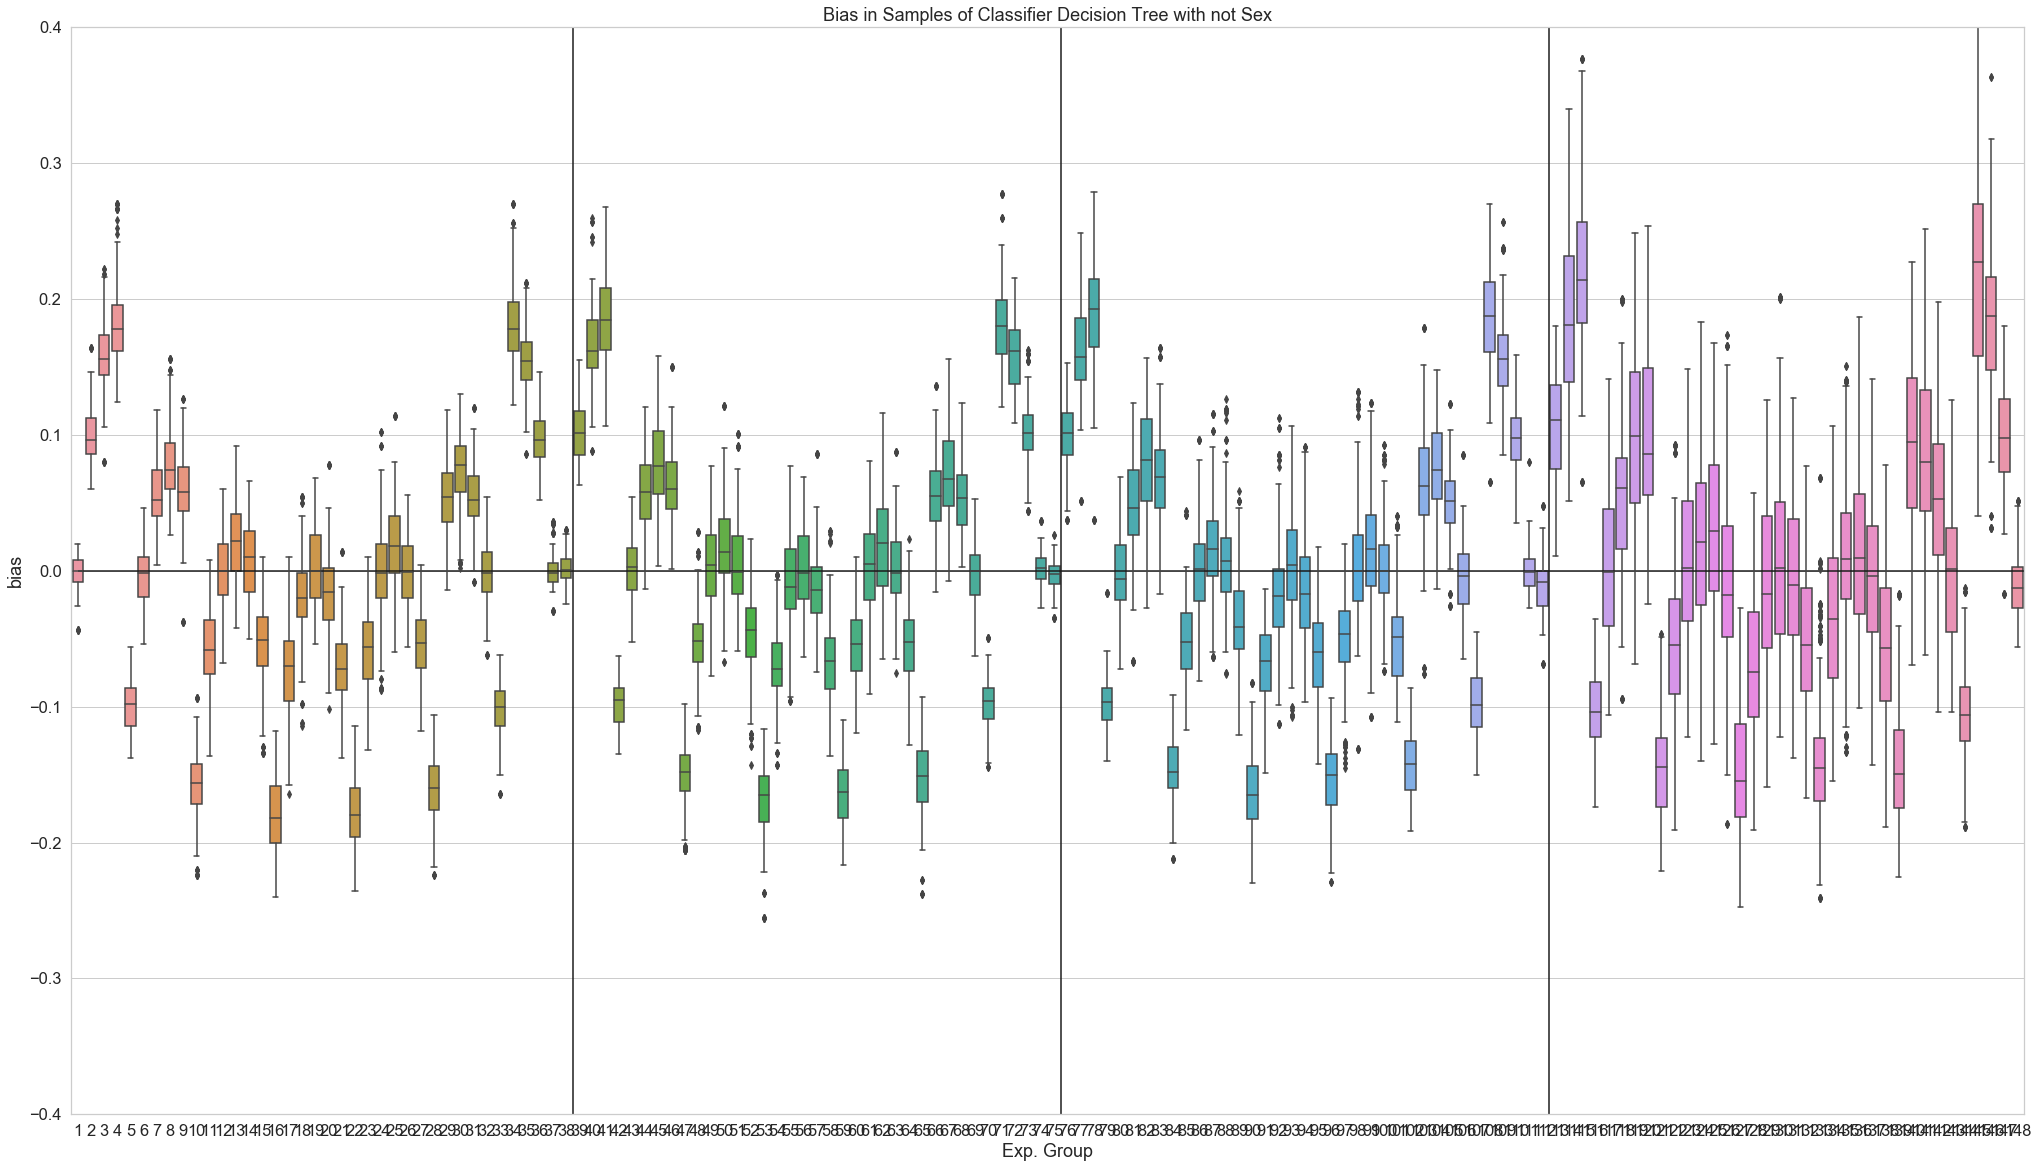

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Decision Tree with not Sex")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='Tree_noSex'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_Tree_noSex.png")

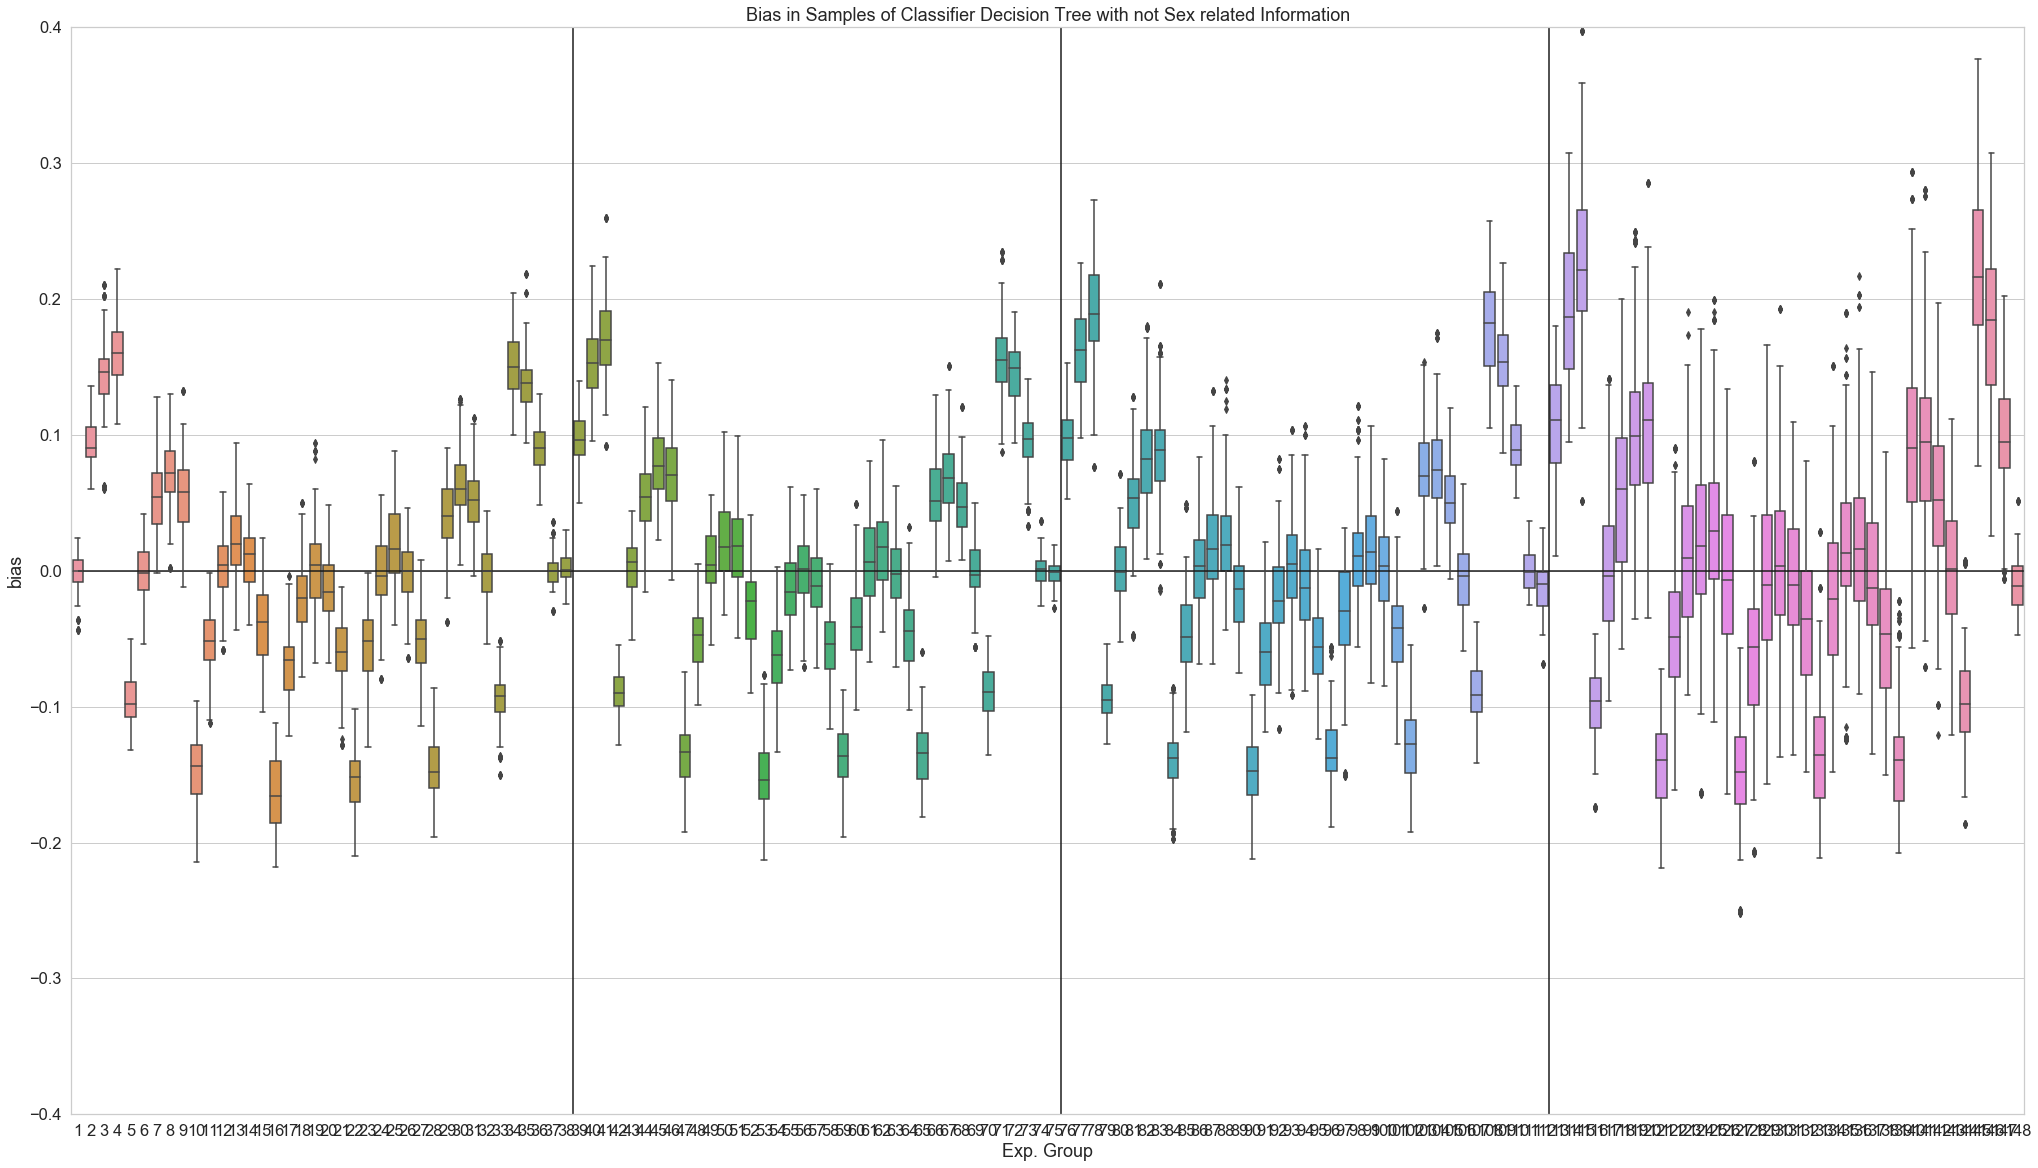

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(37.5,ymin=-0.4,ymax=0.4)
plt.vlines(74.5,ymin=-0.4,ymax=0.4)
plt.vlines(111.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Bias in Samples of Classifier Decision Tree with not Sex related Information")
ax = sns.boxplot(x="Exp. Group", y="bias",data=data[data['Classifier']=='Tree_noSexInf'],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_ALLGROUPS_Tree_noSexInf.png")

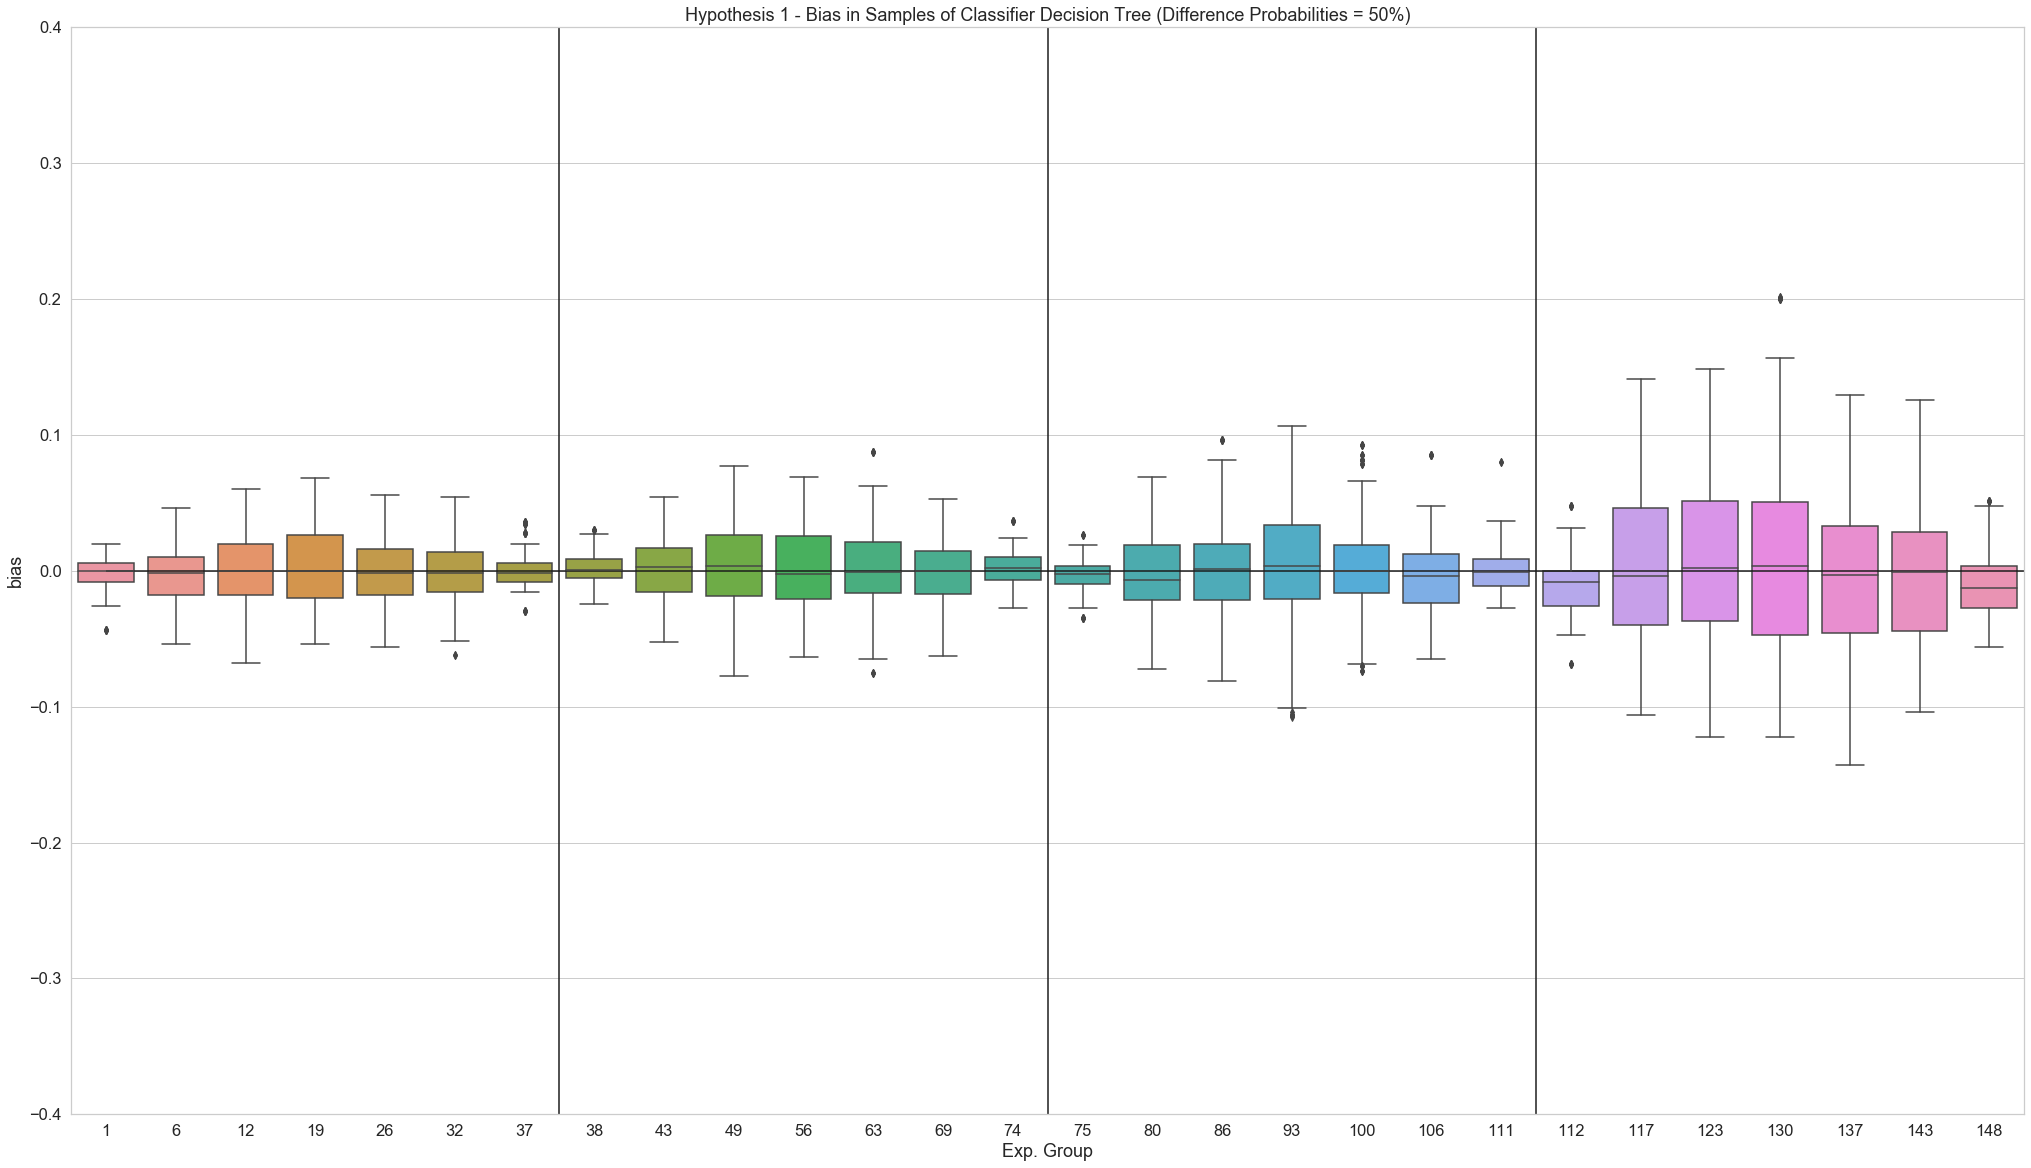

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 20))
plt.hlines(0, xmin= 0, xmax= 148)
plt.vlines(6.5,ymin=-0.4,ymax=0.4)
plt.vlines(13.5,ymin=-0.4,ymax=0.4)
plt.vlines(20.5,ymin=-0.4,ymax=0.4)
sns.set(font_scale=1.5)
plt.title("Hypothesis 1 - Bias in Samples of Classifier Decision Tree (Difference Probabilities = 50%)")
dataplot=data[data['Classifier']=='Tree']
ax = sns.boxplot(x="Exp. Group", y="bias",data=dataplot[dataplot['Difference Probabilities']==Decimal(0)],width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("BIASPLOT_PROBDIFF0_TREE.png")

# Statistische Modellierung

In [ ]:
#Import von benötigten Packages